In [2]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import matplotlib.pyplot as plt

C:\Users\86138\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\86138\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\86138\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\86138\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
NER = spacy.load("en_core_web_sm")

In [3]:
data_peru = pd.read_csv('D:\\Peru Data_1.csv', encoding='ANSI')
data_peru_s2 = pd.read_csv('D:\\Peru Data_2.csv', encoding = 'ANSI')
data_peru_s3 = pd.read_csv('D:\\Peru Data_3.csv', encoding = 'ANSI')
data_peru_s4 = pd.read_csv('D:\\Peru Data_4.csv', encoding = 'ANSI')
data_peru_s5 = pd.read_csv('D:\\Peru Data_5.csv', encoding = 'ANSI')

In [4]:
data_peru.dropna(axis = 1, how='any', inplace=True)

In [18]:
def ner(df, column_number):    # df is the dataframe that needs to be processed; n is the number of entites that display
    
    label_org = []
    word_text_org = []
    
    label_gpe = []
    word_text_gpe = []
    
    text = ""
    for i in range(0, len(df)):
        text = text + str(df.iloc[:,column_number][i]) + " "
    
    NER = spacy.load("en_core_web_sm")
    text1 = NER(text)
    
    for word in text1.ents:
        if(word.label_ == 'ORG'):
            word_text_org.append(word.text)
        elif(word.label_ == 'GPE'):
            word_text_gpe.append(word.text)
        else:
            continue
    
    d_org = {}
    for x in word_text_org:
        if not x in d_org:
            d_org[x] = 1
        else:
            d_org[x] = d_org[x] + 1
    
    item_org = sorted(d_org.items(), key = lambda x: x[1], reverse = True)
#     item_org_sorted = item_org[0:n]
    
    d_gpe_1 = {}
    for x in word_text_gpe:
        if not x in d_gpe_1:
            d_gpe_1[x] = 1
        else:
            d_gpe_1[x] = d_gpe_1[x] + 1
            
    item_gpe = sorted(d_gpe_1.items(), key = lambda x: x[1], reverse = True)
#     item_gpe_sorted = item_gpe[0:n]
    
    return(item_org, item_gpe)


def merge_dict(x, y):
    for k, v in x.items():
        if k in y.keys():
            y[k] = y[k] + v
        else:
            y[k] = v
    return y


def capital_to_lower_combine(dict_info):
    value = []
    new_lower = []
    original_key = []

    for i, j in dict_info.items():
        original_key.append(i)
        value.append(j)
        new_lower.append(i.lower())
#         print(new_dict)

    test = pd.DataFrame({'Organization':new_lower,'Value':value})
    df_count = (test.groupby('Organization').sum())
    df_count = df_count.reset_index(drop=False)
    df = df_count.sort_values(by = "Value" , ascending = False)
    df = df.reset_index(drop=True)
    
    df['dict_reflection'] = "a"

    for i in range(len(df)):
#         print(i)
        for j in range(0, len(original_key)):
            if(df.iloc[i, 0] == new_lower[j]):
                df.iloc[i, 2] = original_key[j]
                
    df.drop(columns='Organization', inplace = True)
                
    return df


def draw_from_dict(dicdata, RANGE, h = 0):
    fig = plt.figure(figsize=(20, 10))
    
    by_value = sorted(dicdata.items(),key = lambda item:item[1],reverse=True)
    
    x = []
    y = []
    
    for d in by_value:
        x.append(d[0])
        y.append(d[1])
        
    if h == 0:
        plt.bar(x[0:RANGE], y[0:RANGE])
        fig.autofmt_xdate(rotation = 90)
        plt.savefig('Peru.svg', format = 'svg')
        plt.show() 
        return 
    
    elif h == 1:
        plt.barh(x[0:RANGE], y[0:RANGE])
        fig.autofmt_xdate(rotation = 0)
        plt.savefig('Peru.svg', format = 'svg')
        plt.show()
        return
    
    else:
        return "Error in input value!"

In [57]:
def OvertimeAnalysis(df):

    compound = []

    sentences = list(df['doc_content'].values)
    for sentence in sentences:
        sid = SentimentIntensityAnalyzer()
    #     print(sentence)
    #     print('=============================================================')
        ss = sid.polarity_scores(sentence)
        compound.append(ss['compound'])
    
    df.loc[:,'sentiment'] = compound
    df2 = df.groupby('doc_year')['sentiment'].mean()
#     print(df2)
    
    df_date_sentiment = df2.to_frame()
    df_date_sentiment = df_date_sentiment.reset_index()
#     print(df_date_sentiment)
    
    plt.style.use('ggplot')

    fig = plt.figure(figsize=(20, 15))

    plt.plot(df_date_sentiment['doc_year'],
             df_date_sentiment['sentiment'],
             linestyle = '-',
             linewidth = 2,
             color = 'steelblue',
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='brown')

#     plt.title('Sentiment Over Time -' + " " + str(df['site_name'][0]))
    plt.title('Sentiment Over Time')
    plt.xlabel('Year')
    plt.ylabel('Compound Sentiment')
#     plt.xticks(min((df_date_sentiment['doc_year']).astype(int)), max((df_date_sentiment['doc_year']).astype(int)))
    plt.ylim(-1, 1)

    plt.tick_params(top = 'off', right = 'off')

    fig.autofmt_xdate(rotation = 90)

    plt.savefig('Peru-analysis.svg', format = 'svg')

    plt.show()
    
    return

In [6]:
def OvertimeAnalysis_doc(df):

    compound = []

    sentences = list(df['doc_content'].values)
    for sentence in sentences:
        sid = SentimentIntensityAnalyzer()
    #     print(sentence)
    #     print('=============================================================')
        ss = sid.polarity_scores(sentence)
        compound.append(ss['compound'])
    
    df.loc[:,'sentiment'] = compound
    df2 = df.groupby('doc_year')['sentiment'].mean()
#     print(df2)
    
    df_date_sentiment = df2.to_frame()
    df_date_sentiment = df_date_sentiment.reset_index()
    return(df_date_sentiment)

In [6]:
item_org_1, item_gpe_1 = ner(data_peru[0:100], 9)

In [7]:
item_org_2, item_gpe_2 = ner(data_peru_s2, 9)

In [8]:
item_org_3, item_gpe_3 = ner(data_peru_s3, 9)

In [9]:
item_org_4, item_gpe_4 = ner(data_peru_s4, 9)

In [10]:
item_org_5, item_gpe_5 = ner(data_peru_s5, 9)

In [11]:
dict_item_org_1 = dict(item_org_1)
dict_item_org_2 = dict(item_org_2)
dict_item_org_3 = dict(item_org_3)
dict_item_org_4 = dict(item_org_4)
dict_item_org_5 = dict(item_org_5)

In [12]:
item_org_12 = merge_dict(dict_item_org_1, dict_item_org_2)
item_org_34 = merge_dict(dict_item_org_3, dict_item_org_4)
item_org_1234 = merge_dict(item_org_12, item_org_34)
item_org_12345 = merge_dict(item_org_1234, dict_item_org_5)

In [13]:
item_org_12345

{'the State Party': 1628,
 'Committee': 2012,
 'the World Heritage Committee': 732,
 'the World Heritage Centre': 715,
 'the Ministry of Culture': 152,
 'Bureau': 830,
 'World Heritage': 666,
 'the List of World Heritage': 344,
 'the Advisory Bodies': 267,
 'The State Party': 147,
 'The World Heritage Committee': 273,
 'UNESCO': 319,
 'the Qhapaq Nan': 46,
 'USD Missions': 71,
 'DDC': 29,
 'ICCROM': 74,
 'PECACH': 38,
 'UGM': 37,
 'The World Heritage Centre': 80,
 'the World Heritage Fund': 172,
 'Decision': 25,
 'the Qhapag Nan': 18,
 'World Heritage Centre': 47,
 'State': 53,
 'Cusco': 66,
 'HIA': 54,
 'Secretariat': 155,
 'the Operational Guidelines': 103,
 'Cuzco (Approved': 12,
 'Chav铆n': 18,
 'Qhapagq Nan': 13,
 'the Bureau of the World Heritage Committee': 53,
 'the Historic Sanctuary': 36,
 'Identity': 23,
 'IUCN': 513,
 'World Heritage Sites': 14,
 'Observer': 26,
 'INC': 76,
 'State Party': 24,
 'the International Support Panel': 16,
 'the Historic Centre of Lima': 26,
 'Acti

In [14]:
df = capital_to_lower_combine(item_org_12345)

In [16]:
df.to_csv('test.csv', encoding='UTF-8_sig')

In [115]:
data_peru_final = pd.read_csv('C:\\Users\\86138\\Desktop\\AJ_peru.csv')
data_peru_final.head()

Value             Organization
0    513                     IUCN
1    165  THE MINISTRY OF CULTURE
2     86          Aguas Calientes
3     76                      INC
4     76                     Inca

In [116]:
dict_peru = dict(zip(data_peru_final['Organization'],data_peru_final['Value']))
dict_peru

{'IUCN': 513,
 'THE MINISTRY OF CULTURE': 165,
 'Aguas Calientes': 86,
 'INC': 76,
 'Inca': 76,
 'ICCROM': 74,
 'Cusco': 66,
 'Icomos': 63,
 'Arequipa': 48,
 'Pampas de Jumana': 48,
 'The Qhapaq Nan': 47,
 'The World Bank': 40,
 'PECACH': 38,
 'INRENA': 37,
 'The Historic Sanctuary': 37,
 'Historical Centre of the City of Arequipa': 31,
 'DDC': 29,
 'Okapi Wildlife Reserve': 28,
 'Seville': 28,
 'The Historic Centre of Lima': 28,
 'Garamba National Park': 27,
 'Durban': 25,
 'the National Institute for Culture (INC)': 25,
 'Santa Laura Saltpeter Works': 23,
 'Vilnius': 23,
 'UNDP': 23,
 'The National Institute for Natural Resources': 23,
 'El Vizcaino': 22,
 'Paraguay': 21,
 'Casas Grandes': 21,
 'The Asian Development Bank': 21,
 'EIA': 21,
 'Virunga National Park': 20,
 'The Peruvian Government': 20,
 'Chiyoda-ku TOKYO': 20,
 'Selous Game Reserve': 19,
 'Kahuzi-Biega National Park': 19,
 'the National Institute of Culture': 19,
 'The International Support Panel': 18,
 'the Qhapag Nan

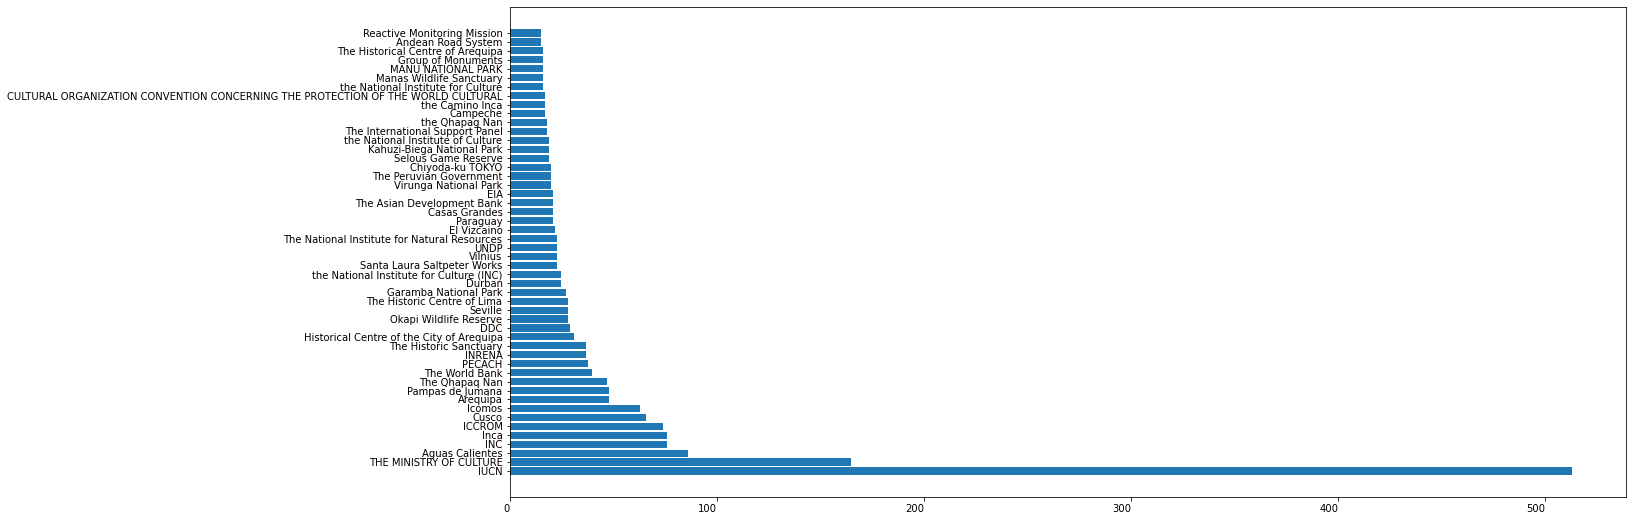

In [117]:
draw_from_dict(dict_peru, 50, h = 1)

# Taj Mahal Analysis - Main Topic and Themes

In [3]:
data_india = pd.read_csv("D:\\India Data.csv", encoding = 'ANSI', low_memory=False)

In [4]:
data_india.head()

country_name                                country_link  \
0        India  https://whc.unesco.org/en/statesparties/in   
1        India  https://whc.unesco.org/en/statesparties/in   
2        India  https://whc.unesco.org/en/statesparties/in   
3        India  https://whc.unesco.org/en/statesparties/in   
4        India  https://whc.unesco.org/en/statesparties/in   

                                           site_name  \
0  Chhatrapati Shivaji Terminus (formerly Victori...   
1                           Manas Wildlife Sanctuary   
2                         Great Living Chola Temples   
3                         Great Living Chola Temples   
4                                       Ellora Caves   

                            site_link                 coordinates  \
0  https://whc.unesco.org/en/list/945   N18 56 24.44 E72 50 10.33   
1  https://whc.unesco.org/en/list/338          N26 43 30 E91 1 50   
2  https://whc.unesco.org/en/list/250          N10 46 59 E79 7 57   
3  https://whc.unesco.org/en/list/250          N10 46 59 E79 7 57   
4  https://whc.unesco.org/en/list/243  N20 1 35.004 E75 10 45.012   

                                           doc_title  \
0                  Advisory Body Evaluation (ICOMOS)   
1                    Advisory Body Evaluation (IUCN)   
2                  Advisory Body Evaluation (ICOMOS)   
3                  Advisory Body Evaluation (ICOMOS)   
4  Advisory Body Evaluation (ICOMOS) / 脡valuation...   

                                 doc_link doc_year      doc_type  \
0  https://whc.unesco.org/document/154660     2004  ABevaluation   
1  https://whc.unesco.org/document/153224     1985  ABevaluation   
2  https://whc.unesco.org/document/153042     2004  ABevaluation   
3  https://whc.unesco.org/document/153044     1987  ABevaluation   
4  https://whc.unesco.org/document/153028     1983  ABevaluation   

                                         doc_content  ... Unnamed: 2992  \
0  Chhatrapati Shivaji Terminus (India) No 945 re...  ...           NaN   
1  a . 1 " 1 A a i a q 7 1 i 1 4 4 鈥?f { 鈥?NOMINA...  ...           NaN   
2  Chola Temples (India) No 250 bis 1. BASIC DATA...  ...           NaN   
3  ICOMOS INTERNATIONAL COUNCIL ON MONUMENTS AND ...  ...           NaN   
4  ICOMOS INTERNATIONAL COUNCIL ON MONUMENTS AND ...  ...           NaN   

  Unnamed: 2993 Unnamed: 2994 Unnamed: 2995 Unnamed: 2996 Unnamed: 2997  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

  Unnamed: 2998 Unnamed: 2999 Unnamed: 3000 Unnamed: 3001  
0           NaN           NaN           NaN           NaN  
1           NaN           NaN           NaN           NaN  
2           NaN           NaN           NaN           NaN  
3           NaN           NaN           NaN           NaN  
4           NaN           NaN           NaN           NaN  

[5 rows x 3002 columns]

In [5]:
data_india.dropna(axis = 1, how='any', inplace=True)

In [17]:
data_taj_mahal = data_india[data_india['site_name'].str.contains('Taj Mahal')]
data_taj_mahal = data_taj_mahal.reset_index(drop = True)
data_taj_mahal.head(1)

country_name                                country_link  site_name  \
0        India  https://whc.unesco.org/en/statesparties/in  Taj Mahal   

                            site_link                 coordinates  \
0  https://whc.unesco.org/en/list/252  N27 10 27.012 E78 2 31.992   

                                           doc_title  \
0  Advisory Body Evaluation (ICOMOS) / 脡valuation...   

                                 doc_link doc_year      doc_type  \
0  https://whc.unesco.org/document/153049     1983  ABevaluation   

                                         doc_content  
0  ICOMOS INTERNATIONAL COUNCIL ON MONUMENTS AND ...

In [20]:
item_org_TM, item_gpe_TM = ner(data_taj_mahal, 9)

In [24]:
df = capital_to_lower_combine(dict(item_org_TM))

In [25]:
df.to_csv('India_TM.csv', encoding='UTF-8_sig')

In [27]:
df_TM = pd.read_csv('./India_TM.csv')
df_TM.head(1)

Value Organization
0     11         IUCN

In [28]:
dict_TM = dict(zip(df_TM['Organization'],df_TM['Value']))
dict_TM

{'IUCN': 11,
 'Fatehpur Sikri': 8,
 'ASI': 8,
 'the Advisory Bodies': 8,
 'CISF': 7,
 'Secretariat': 6,
 'ICOMOS': 5,
 'The Archaeological Survey of India': 3,
 'Yamuna': 3,
 'Agra': 3,
 'Mausoleum': 2,
 'the "Taj Heritage Corridor Project': 2,
 'Talamanca Range-La Amistad Reserve': 2,
 'the Supreme Court': 2,
 'Kongoli': 2,
 'Florence': 2,
 'Inca': 2,
 'Gorowi': 2,
 'WHF': 2,
 'Baroque Churches': 2,
 'Mogul': 2,
 'Sao Miguel': 2,
 'Queen Arjumand Banu Begam': 2,
 'Rila': 2,
 'Prambanan Temple Compounds': 2,
 'Caiano': 2,
 'Agra Fort': 2,
 'the Central Industrial Security Force': 1,
 'the Central Office of Historic Monuments Riksantikvaren': 1,
 'Rhodia Chemicals': 1,
 'the Church of St. Elizabeth of Marburg': 1,
 'the Central Power Water Research Centre': 1,
 'the Cultural Environment of Florence': 1,
 'the Directorate Office': 1,
 'the Djoudj National Bird Sanctuary': 1,
 'the Asian Development Bank': 1,
 'Srebarna Nature Reserve': 1,
 'Royal Hill': 1,
 'the Antiquities Department': 

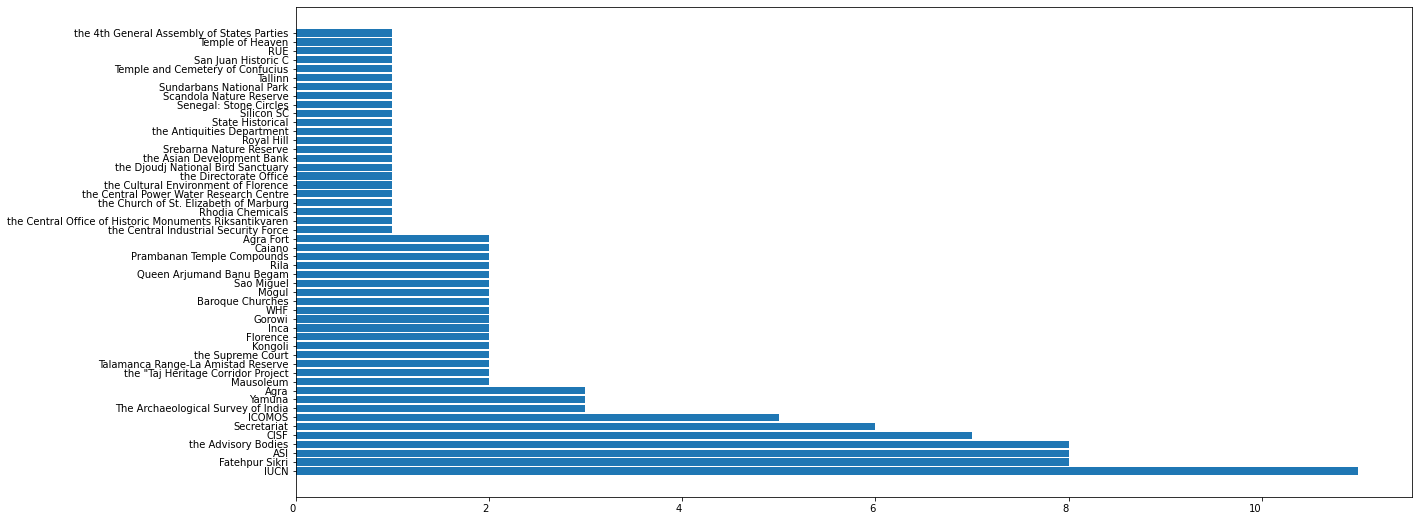

In [29]:
draw_from_dict(dict_TM, 50, h = 1)

In [34]:
data_TM_for_analysis = data_taj_mahal.iloc[:, [2,5,7,9]]
data_TM_for_analysis.head(5)

site_name                                          doc_title doc_year  \
0  Taj Mahal  Advisory Body Evaluation (ICOMOS) / 脡valuation...     1983   
1  Taj Mahal                    37COM 7B.103 - Omnibus Decision     2013   
2  Taj Mahal  36COM 8E - Adoption of retrospective Statement...     2012   
3  Taj Mahal  27COM 7B.105 - Agra Fort, Taj Mahal, Fatehpur ...     2003   
4  Taj Mahal  28COM 15B.58 - Taj Mahal, Agra Fort and Fatehp...     2004   

                                         doc_content  
0  ICOMOS INTERNATIONAL COUNCIL ON MONUMENTS AND ...  
1  World Heritage Committee, 1. Having examined D...  
2  The World Heritage Committee, 1. Having examin...  
3  The World Heritage Committee,1. Expresses grav...  
4  The World Heritage Committee, Takes note of th...

C:\Users\86138\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


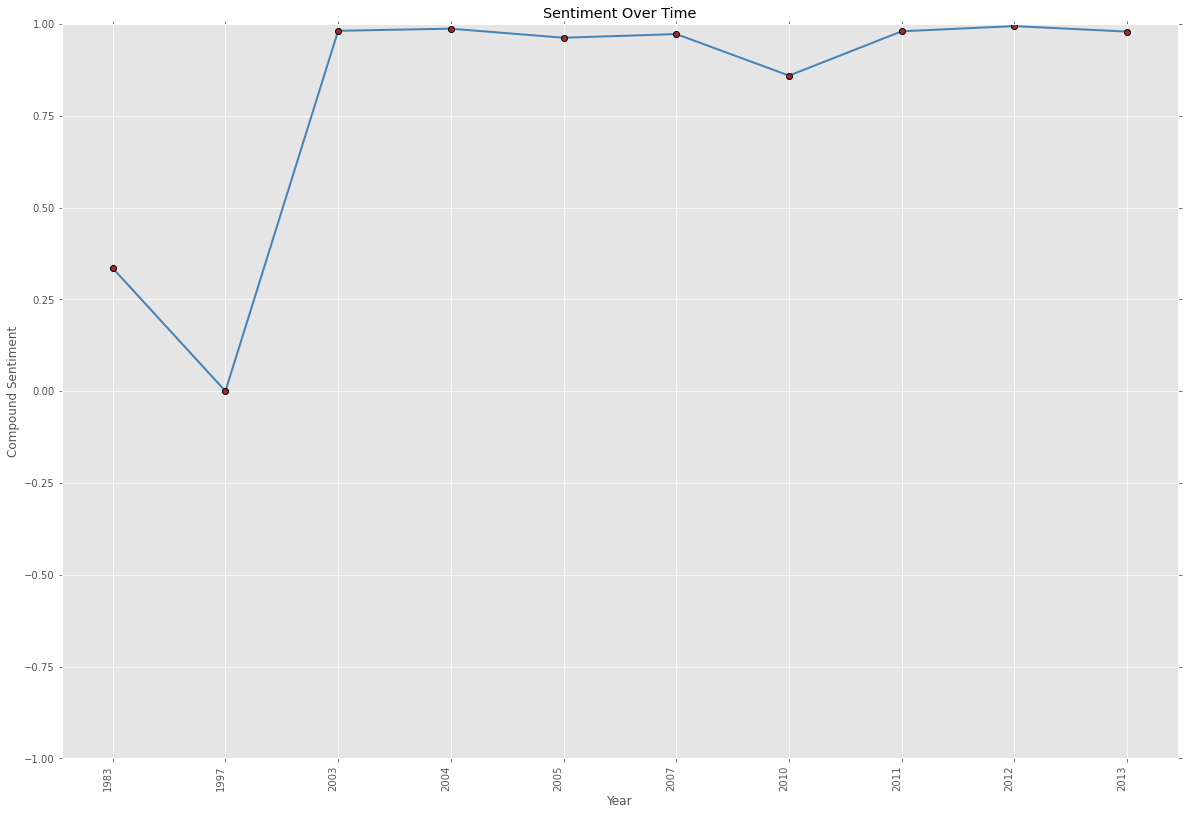

In [58]:
OvertimeAnalysis(data_TM_for_analysis)

# qutb minar Analysis - Sentiment and Themes

In [64]:
data_QM = data_india[data_india['site_name'].str.contains('Qutb Minar and its Monuments, Delhi')]
data_QM = data_QM.reset_index(drop = True)
data_QM.head(1)

country_name                                country_link  \
0        India  https://whc.unesco.org/en/statesparties/in   

                             site_name                           site_link  \
0  Qutb Minar and its Monuments, Delhi  https://whc.unesco.org/en/list/233   

                  coordinates                          doc_title  \
0  N28 31 32.988 E77 11 7.008  Advisory Body Evaluation (ICOMOS)   

                                 doc_link doc_year      doc_type  \
0  https://whc.unesco.org/document/153020     1993  ABevaluation   

                                         doc_content  ... Unnamed: 2992  \
0  WORLD HERITAGE LIST The Qutb Minar No 233 Iden...  ...           NaN   

  Unnamed: 2993 Unnamed: 2994 Unnamed: 2995 Unnamed: 2996 Unnamed: 2997  \
0           NaN           NaN           NaN           NaN           NaN   

  Unnamed: 2998 Unnamed: 2999 Unnamed: 3000 Unnamed: 3001  
0           NaN           NaN           NaN           NaN  

[1 rows x 3002 columns]

In [65]:
item_org_QM, item_gpe_QM = ner(data_QM, 9)

In [66]:
df_QM = capital_to_lower_combine(dict(item_org_QM))

In [67]:
df_QM.to_csv('India_QM.csv', encoding='UTF-8_sig')

In [69]:
df_QM_2 = pd.read_csv('./India_QM.csv')
df_QM_2.head()

Value                        Organization
0      7                                IUCN
1      5  The Archaeological Survey of India
2      5                              ICCROM
3      4                                UNDP
4      4                                 NAL

In [70]:
dict_QM = dict(zip(df_QM_2['Organization'],df_QM_2['Value']))
dict_QM

{'IUCN': 7,
 'The Archaeological Survey of India': 5,
 'ICCROM': 5,
 'UNDP': 4,
 'NAL': 4,
 'RAPPORTEUR': 3,
 'Badran': 3,
 'the International Council on Monuments and Sites (ICOMOS': 2,
 'the International Centre for the Study of the Preservation': 2,
 'Alai-Darwaza': 2,
 'Amendment Rules': 2,
 'Paraguay': 2,
 'the World Bank': 2,
 'the World Conservation Union': 2,
 'Education of Colombia': 2,
 'the Ancient Monument and Archaeological Site': 2,
 "Qutbu'd-Din Aibak": 2,
 'Archaeological Survey of India': 2,
 'COLCULTURA': 2,
 'the Delhi Development Act': 1,
 'the Delegate of Colombia': 1,
 'the Jesuit Missions': 1,
 'the Cultural Property': 1,
 'The Indian Oil Corporation': 1,
 'the Historic Centre of La Havana': 1,
 'the Global Environmental Forum': 1,
 'The Delegate of Italy': 1,
 'The Delhi Municipal Corporation Act': 1,
 'the General Assembly': 1,
 'The Archaeological Survey of Ind': 1,
 'the Environment (Protection) Act': 1,
 'the Delegates of France': 1,
 'the Monastery of Horez

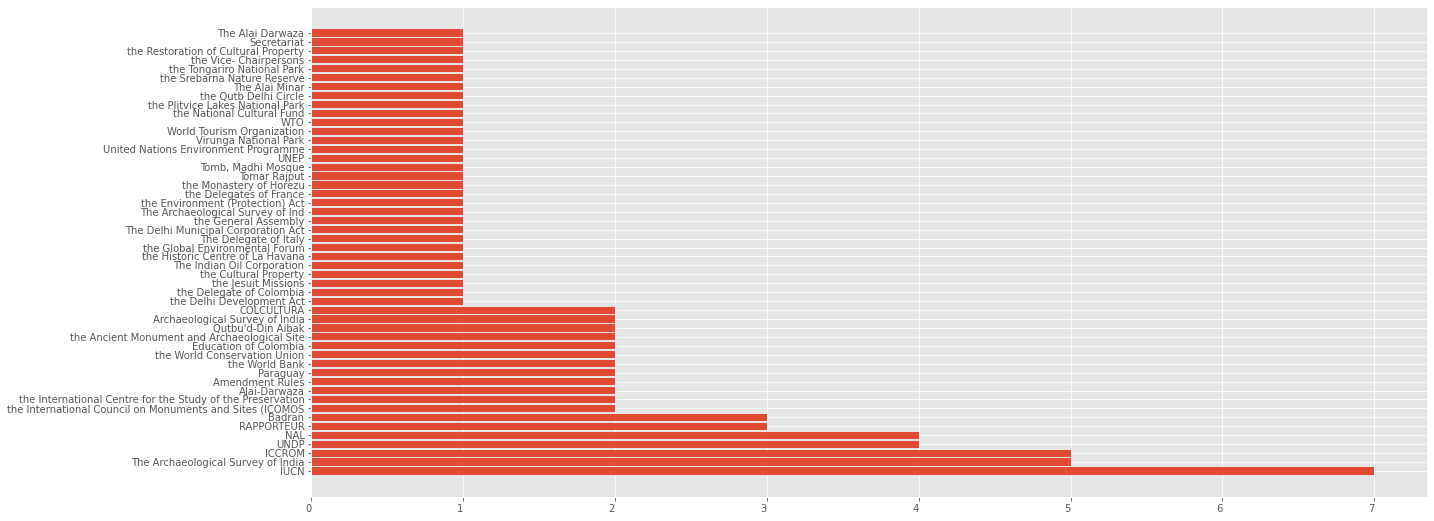

In [71]:
draw_from_dict(dict_QM, 50, h = 1)

In [72]:
data_QM_for_analysis = data_QM.iloc[:, [2,5,7,9]]
data_QM_for_analysis.head(5)

site_name  \
0  Qutb Minar and its Monuments, Delhi   
1  Qutb Minar and its Monuments, Delhi   
2  Qutb Minar and its Monuments, Delhi   
3  Qutb Minar and its Monuments, Delhi   
4  Qutb Minar and its Monuments, Delhi   

                                           doc_title doc_year  \
0                  Advisory Body Evaluation (ICOMOS)     1993   
1        Report of the 17th Session of the Committee     1993   
2  17COM XI - Inscription: Qutb Minar and its mon...     1993   
3             Periodic Reporting Cycle 1, Section II     2003   
4   Periodic Reporting Cycle 1, Section II (Summary)     2003   

                                         doc_content  
0  WORLD HERITAGE LIST The Qutb Minar No 233 Iden...  
1  WH Committee, Report of the 17th Session, Cart...  
2  Qutb Minar and its monu颅ments, Delhi 233 India...  
3  PERIODIC REPORTING ON THE APPLICAITON OF THE W...  
4  State of Conservation of the World Heritage Pr...

C:\Users\86138\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\86138\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


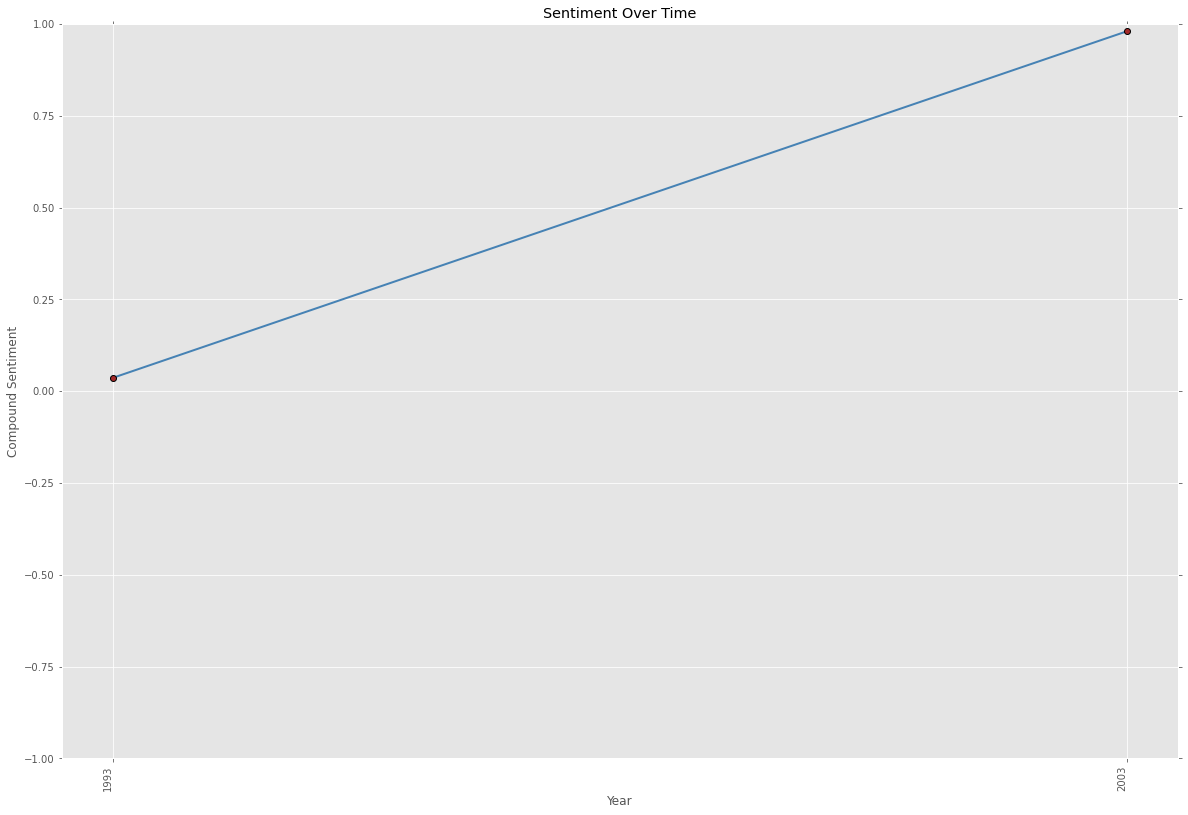

In [73]:
OvertimeAnalysis(data_QM_for_analysis)

# Main topics and themes in India

In [19]:
data_india = pd.read_csv("D:\\India Data.csv", encoding = 'ANSI', low_memory=False)

In [30]:
item_org_1, item_gpe_1 = ner(data_india[0:60], 9)

In [31]:
df_1 = data_india.iloc[60:100, :]
df_1 = df_1.reset_index(drop = True)
item_org_2, item_gpe_2 = ner(df_1, 9)

In [32]:
df_2 = data_india.iloc[100:200, :]
df_2 = df_2.reset_index(drop = True)
item_org_3, item_gpe_3 = ner(df_2, 9)

In [33]:
df_3 = data_india.iloc[200:300, :]
df_3 = df_3.reset_index(drop = True)
item_org_4, item_gpe_4 = ner(df_3, 9)

In [34]:
df_4 = data_india.iloc[300:360, :]
df_4 = df_4.reset_index(drop = True)
item_org_5, item_gpe_5 = ner(df_4, 9)

In [35]:
df_5 = data_india.iloc[360:400, :]
df_5 = df_5.reset_index(drop = True)
item_org_6, item_gpe_6 = ner(df_5, 9)

In [36]:
df_6 = data_india.iloc[400:458, :]
df_6 = df_6.reset_index(drop = True)
item_org_7, item_gpe_7 = ner(df_6, 9)

In [37]:
dict_item_org_1 = dict(item_org_1)
dict_item_org_2 = dict(item_org_2)
dict_item_org_3 = dict(item_org_3)
dict_item_org_4 = dict(item_org_4)
dict_item_org_5 = dict(item_org_5)
dict_item_org_6 = dict(item_org_6)
dict_item_org_7 = dict(item_org_7)

In [38]:
item_org_12 = merge_dict(dict_item_org_1, dict_item_org_2)
item_org_34 = merge_dict(dict_item_org_3, dict_item_org_4)
item_org_56 = merge_dict(dict_item_org_5, dict_item_org_6)
item_org_1234 = merge_dict(item_org_12, item_org_34)
item_org_567 = merge_dict(item_org_56, dict_item_org_7)
item_org_1234567 = merge_dict(item_org_1234, item_org_567)

In [39]:
item_org_1234567

{'the State Party': 1224,
 'World Heritage': 1246,
 'Committee': 2428,
 'the World Heritage Centre': 537,
 'the World Heritage Committee': 531,
 'Bureau': 777,
 'IUCN': 627,
 'ASI': 211,
 'the List of World Heritage': 320,
 'UNESCO': 378,
 'IMP': 87,
 'Group of Monuments': 62,
 'The State Party': 110,
 'The World Heritage Committee': 242,
 'the Advisory Bodies': 138,
 'The World Heritage Centre': 37,
 'Manas Wildlife Sanctuary': 86,
 'the Central Government': 42,
 'State': 148,
 'the State Government': 80,
 'WH': 57,
 'State Party': 67,
 'the Operational Guidelines': 94,
 'World Heritage Centre': 27,
 'Archaeological Sites & Remains': 20,
 'Manas': 65,
 'the Integrated Management Plan': 26,
 'Archaeological Survey of India': 41,
 'the State Government of': 25,
 'Manas National Park': 22,
 'Fatehpur Sikri': 62,
 'Siva': 28,
 'the World Heritage': 26,
 'the Bodoland Territorial Council': 22,
 'Park': 20,
 'UNESCO Extra-Budgetary Funds': 13,
 'World Heritage Centre/ICOMOS': 18,
 'WHF': 24

In [40]:
df_1 = capital_to_lower_combine(item_org_1234567)

In [41]:
df_1.to_csv('test_india.csv', encoding='UTF-8_sig')

In [112]:
data_India = pd.read_csv('C:\\Users\\86138\\Desktop\\aj_india.csv', encoding='ANSI')
data_India.head(1)

Value Organization
0    627         IUCN

In [113]:
dict_india = dict(zip(data_india_final['Organization'],data_india_final['Value']))
dict_india

{'IUCN': 627,
 'ASI': 211,
 'IMP': 87,
 'Manas wildlife Sanctuary': 87,
 'KNP': 86,
 'ICOMOS': 74,
 'RAPPORTEUR': 67,
 'Manas': 65,
 'Fatehpur Sikri': 62,
 'Group of Monuments': 62,
 'GHNP': 61,
 'WH': 57,
 'DHR': 52,
 'The Government of India': 51,
 'The Archaeological Survey of India': 49,
 'The Central Government': 46,
 'VoF': 44,
 'VI': 44,
 'ARCHAEOLOGICAL SURVEY OF INDIA': 42,
 'Le Corbusier': 35,
 'UNDP': 34,
 'ICCROM': 33,
 'KSR': 33,
 'The Darjeeling Himalayan Railway': 33,
 'the Archaeological Survey of': 33,
 'The World Bank': 30,
 'Durban': 30,
 'the Modern Movement': 29,
 'Khajuraho': 29,
 'THE BUREAU OF THE WORLD HERITAGE COMMITTEE': 28,
 'Siva': 28,
 'Archaeological Survey': 28,
 'MNP': 28,
 'The Integrated Management Plan': 27,
 'CST': 27,
 'The Mahabodhi Temple': 26,
 'The Mahabodhi Temple Complex': 26,
 'CULTURAL ORGANIZATION CONVENTION CONCERNING THE PROTECTION OF THE WORLD CULTURAL': 26,
 'SUN TEMPLE': 25,
 'Yamuna': 25,
 'Regrets': 24,
 'the Red Fort Complex': 24,


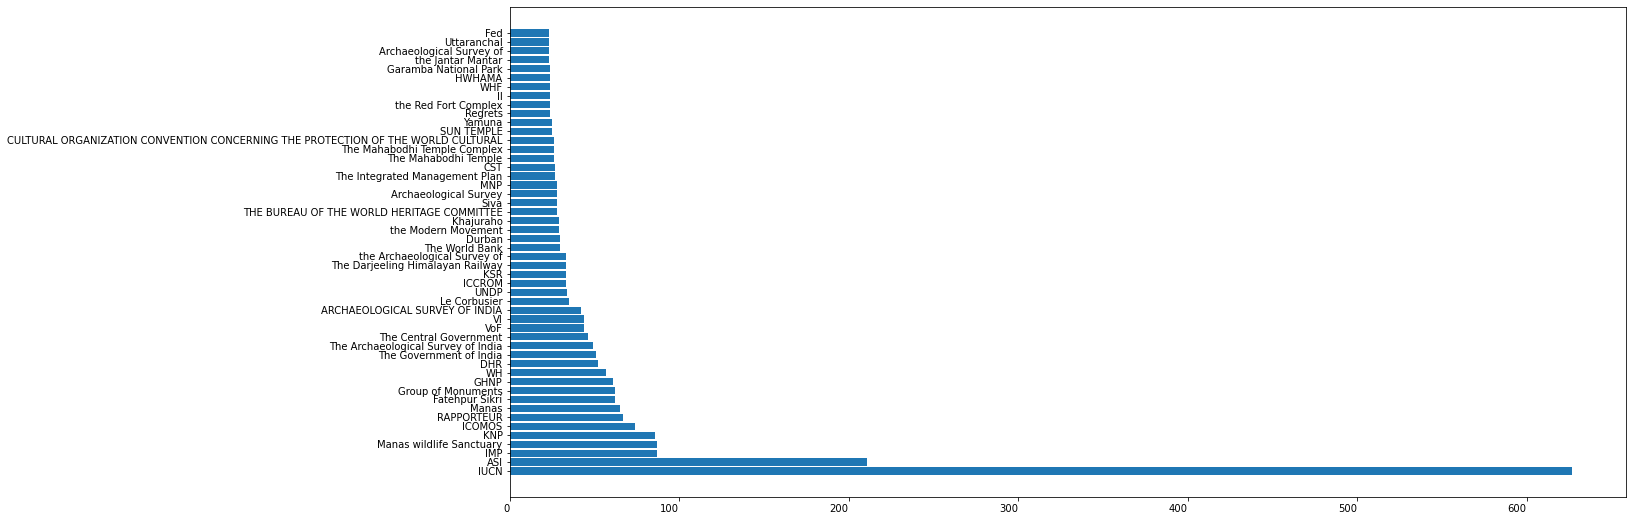

In [114]:
draw_from_dict(dict_india, 50, h = 1)

In [ ]:
# UNESCO, World heritage, convention, state, bureau.....   by myelf 

# Sentiment for Site

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\Users\86138\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
data_india = pd.read_csv("D:\\India Data.csv", encoding = 'ANSI', low_memory=False)
data_india.head()

country_name                                country_link  \
0        India  https://whc.unesco.org/en/statesparties/in   
1        India  https://whc.unesco.org/en/statesparties/in   
2        India  https://whc.unesco.org/en/statesparties/in   
3        India  https://whc.unesco.org/en/statesparties/in   
4        India  https://whc.unesco.org/en/statesparties/in   

                                           site_name  \
0  Chhatrapati Shivaji Terminus (formerly Victori...   
1                           Manas Wildlife Sanctuary   
2                         Great Living Chola Temples   
3                         Great Living Chola Temples   
4                                       Ellora Caves   

                            site_link                 coordinates  \
0  https://whc.unesco.org/en/list/945   N18 56 24.44 E72 50 10.33   
1  https://whc.unesco.org/en/list/338          N26 43 30 E91 1 50   
2  https://whc.unesco.org/en/list/250          N10 46 59 E79 7 57   
3  https://whc.unesco.org/en/list/250          N10 46 59 E79 7 57   
4  https://whc.unesco.org/en/list/243  N20 1 35.004 E75 10 45.012   

                                           doc_title  \
0                  Advisory Body Evaluation (ICOMOS)   
1                    Advisory Body Evaluation (IUCN)   
2                  Advisory Body Evaluation (ICOMOS)   
3                  Advisory Body Evaluation (ICOMOS)   
4  Advisory Body Evaluation (ICOMOS) / 脡valuation...   

                                 doc_link doc_year      doc_type  \
0  https://whc.unesco.org/document/154660     2004  ABevaluation   
1  https://whc.unesco.org/document/153224     1985  ABevaluation   
2  https://whc.unesco.org/document/153042     2004  ABevaluation   
3  https://whc.unesco.org/document/153044     1987  ABevaluation   
4  https://whc.unesco.org/document/153028     1983  ABevaluation   

                                         doc_content  ... Unnamed: 2992  \
0  Chhatrapati Shivaji Terminus (India) No 945 re...  ...           NaN   
1  a . 1 " 1 A a i a q 7 1 i 1 4 4 鈥?f { 鈥?NOMINA...  ...           NaN   
2  Chola Temples (India) No 250 bis 1. BASIC DATA...  ...           NaN   
3  ICOMOS INTERNATIONAL COUNCIL ON MONUMENTS AND ...  ...           NaN   
4  ICOMOS INTERNATIONAL COUNCIL ON MONUMENTS AND ...  ...           NaN   

  Unnamed: 2993 Unnamed: 2994 Unnamed: 2995 Unnamed: 2996 Unnamed: 2997  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

  Unnamed: 2998 Unnamed: 2999 Unnamed: 3000 Unnamed: 3001  
0           NaN           NaN           NaN           NaN  
1           NaN           NaN           NaN           NaN  
2           NaN           NaN           NaN           NaN  
3           NaN           NaN           NaN           NaN  
4           NaN           NaN           NaN           NaN  

[5 rows x 3002 columns]

In [4]:
data_india_for_analysis = data_india.iloc[:, [2,5,7,9]]
data_india_for_analysis.head(5)

site_name  \
0  Chhatrapati Shivaji Terminus (formerly Victori...   
1                           Manas Wildlife Sanctuary   
2                         Great Living Chola Temples   
3                         Great Living Chola Temples   
4                                       Ellora Caves   

                                           doc_title doc_year  \
0                  Advisory Body Evaluation (ICOMOS)     2004   
1                    Advisory Body Evaluation (IUCN)     1985   
2                  Advisory Body Evaluation (ICOMOS)     2004   
3                  Advisory Body Evaluation (ICOMOS)     1987   
4  Advisory Body Evaluation (ICOMOS) / 脡valuation...     1983   

                                         doc_content  
0  Chhatrapati Shivaji Terminus (India) No 945 re...  
1  a . 1 " 1 A a i a q 7 1 i 1 4 4 鈥?f { 鈥?NOMINA...  
2  Chola Temples (India) No 250 bis 1. BASIC DATA...  
3  ICOMOS INTERNATIONAL COUNCIL ON MONUMENTS AND ...  
4  ICOMOS INTERNATIONAL COUNCIL ON MONUMENTS AND ...

In [14]:
(data_india_for_analysis['site_name'].unique())

array(['Chhatrapati Shivaji Terminus (formerly Victoria Terminus)',
       'Manas Wildlife Sanctuary', 'Great Living Chola Temples',
       'Ellora Caves', 'Elephanta Caves', 'Buddhist Monuments at Sanchi',
       'Champaner-Pavagadh Archaeological Park', 'Ajanta Caves',
       'Archaeological Site of Nalanda Mahavihara at Nalanda, Bihar',
       'Keoladeo National Park', 'Fatehpur Sikri', 'Agra Fort',
       'Khangchendzonga National Park', 'Western Ghats',
       'Nanda Devi and Valley of Flowers National Parks  ',
       'Sundarbans National Park', 'Mountain Railways of India',
       'Qutb Minar and its Monuments, Delhi',
       'Rani-ki-Vav (the Queen鈥檚 Stepwell) at Patan, Gujarat',
       'Red Fort Complex', 'Rock Shelters of Bhimbetka',
       'Mahabodhi Temple Complex at Bodh Gaya', 'Sun Temple, Kon芒rak',
       'Taj Mahal', 'Historic City of Ahmadabad',
       'Jaipur City, Rajasthan', "Humayun's Tomb, Delhi",
       'Victorian Gothic and Art Deco Ensembles of Mumbai',
       

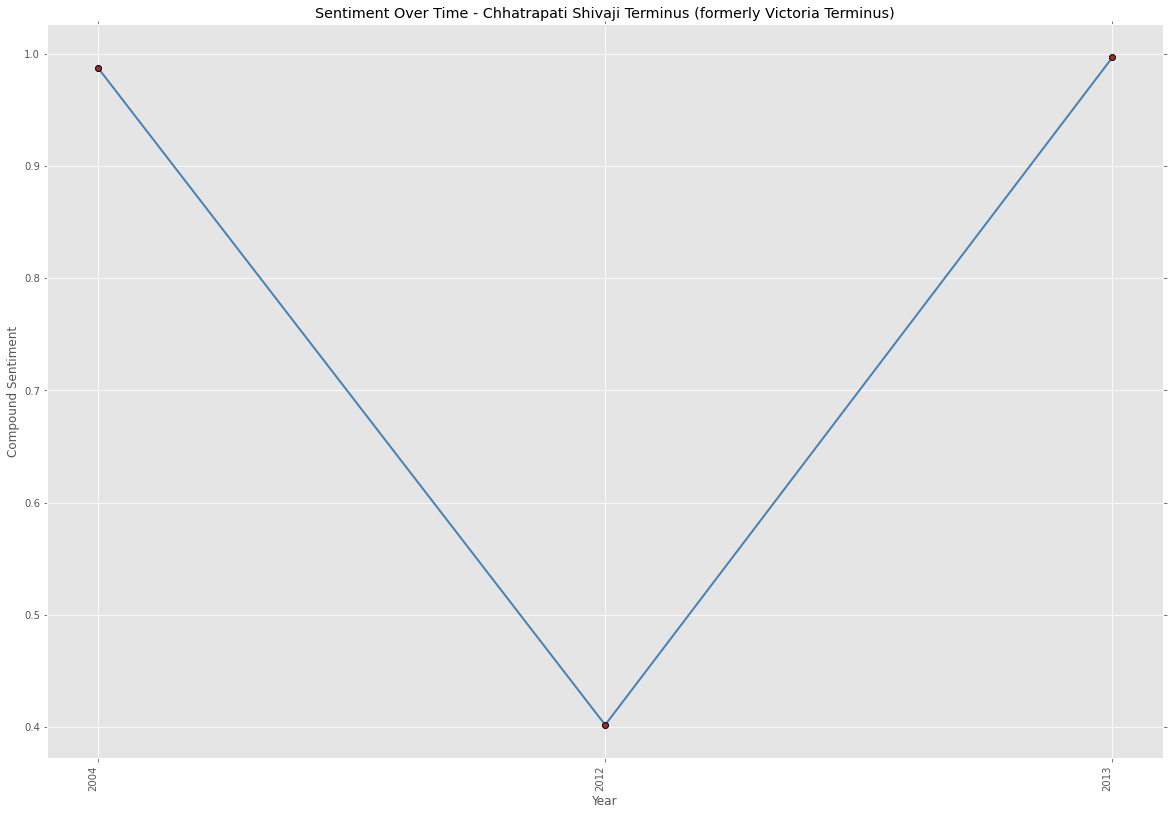

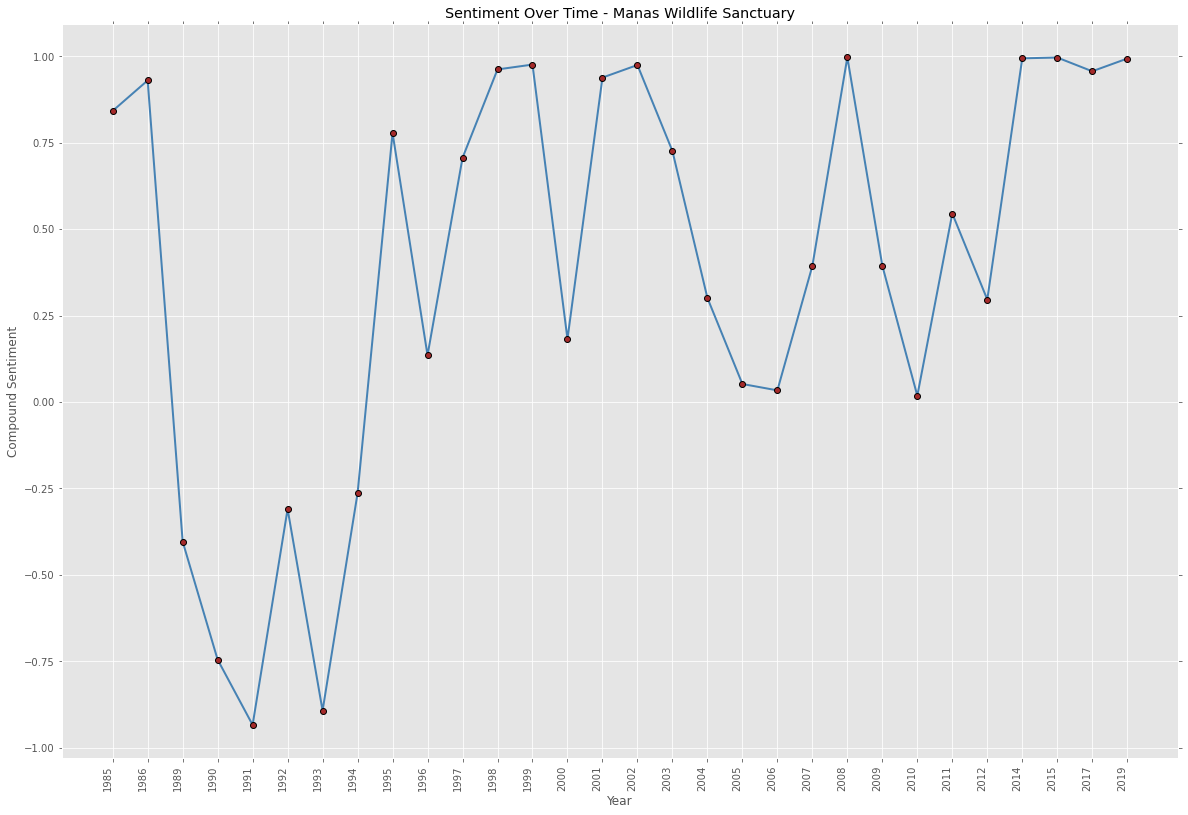

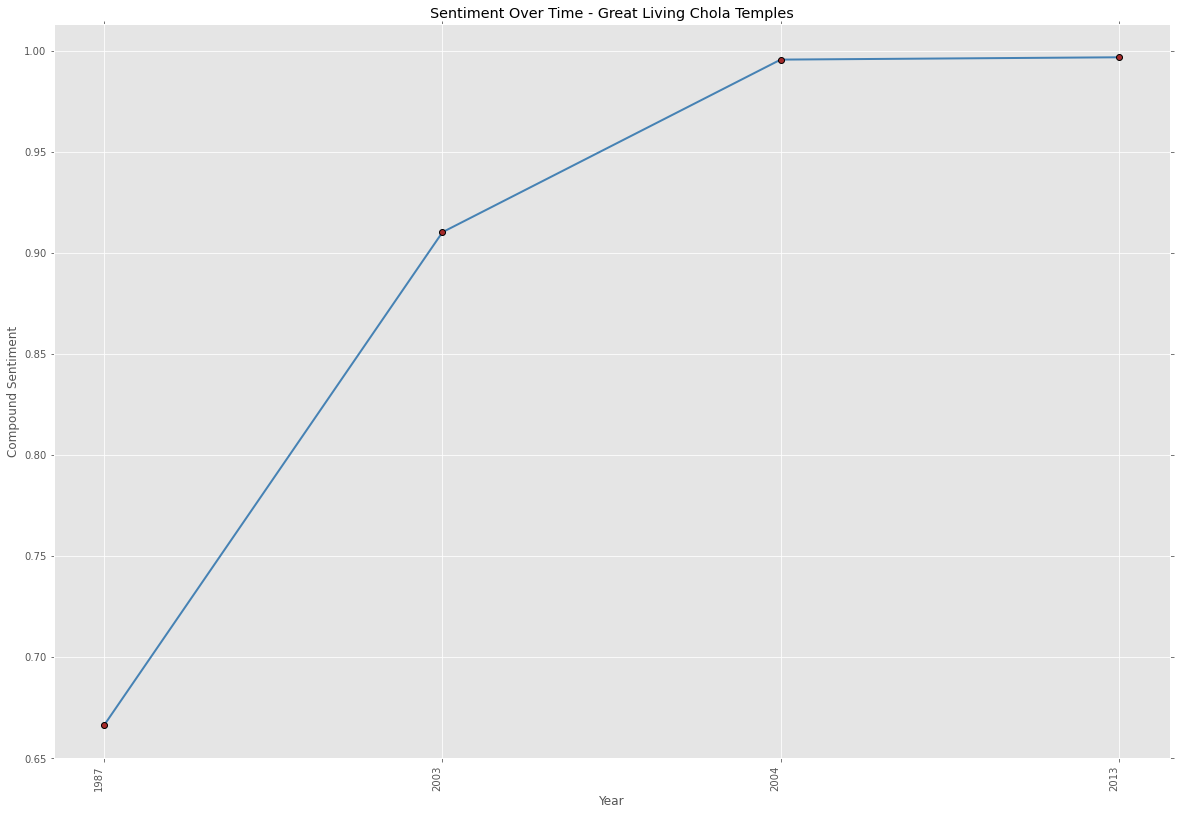

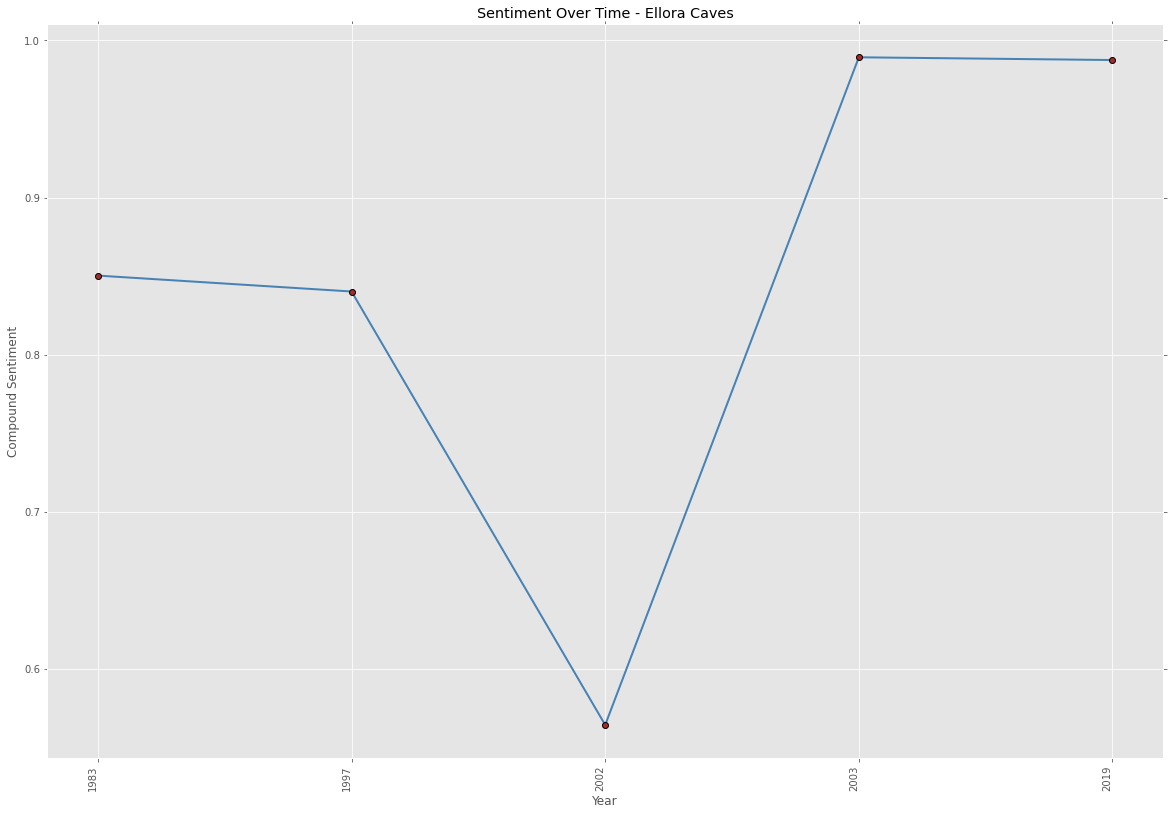

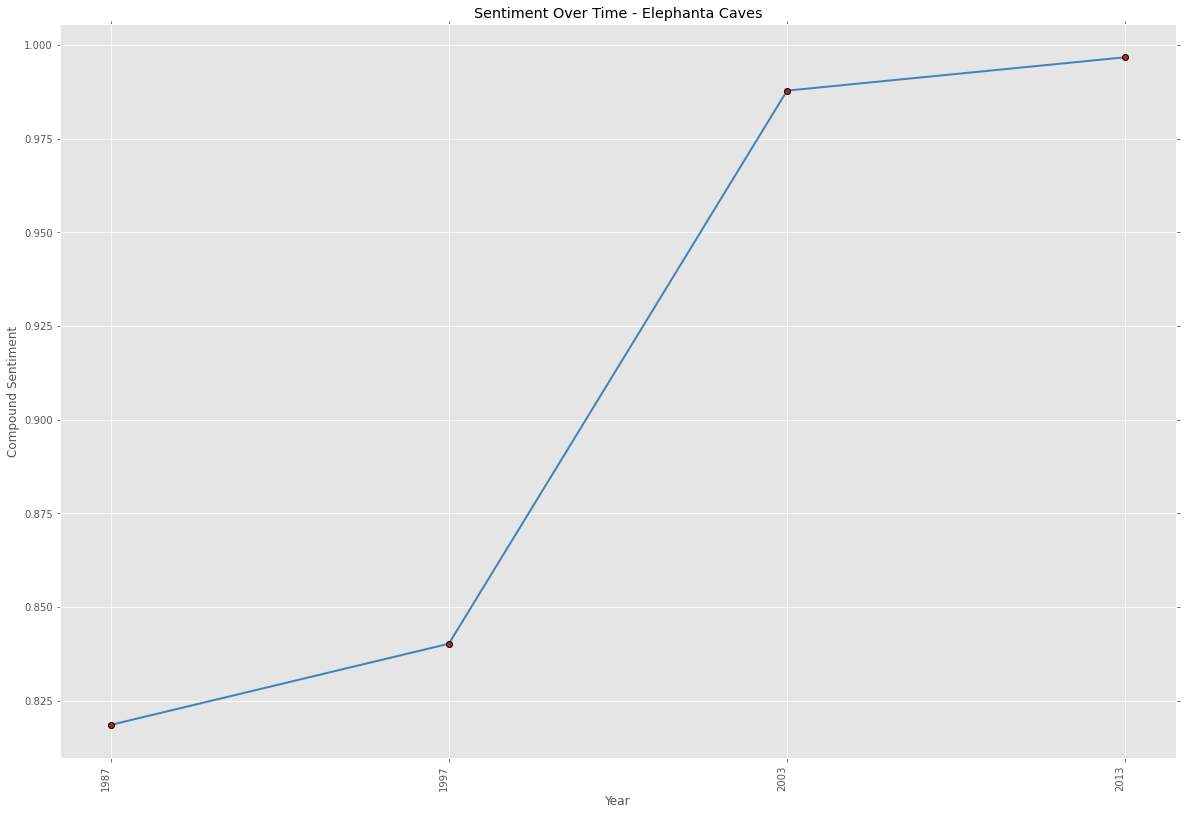

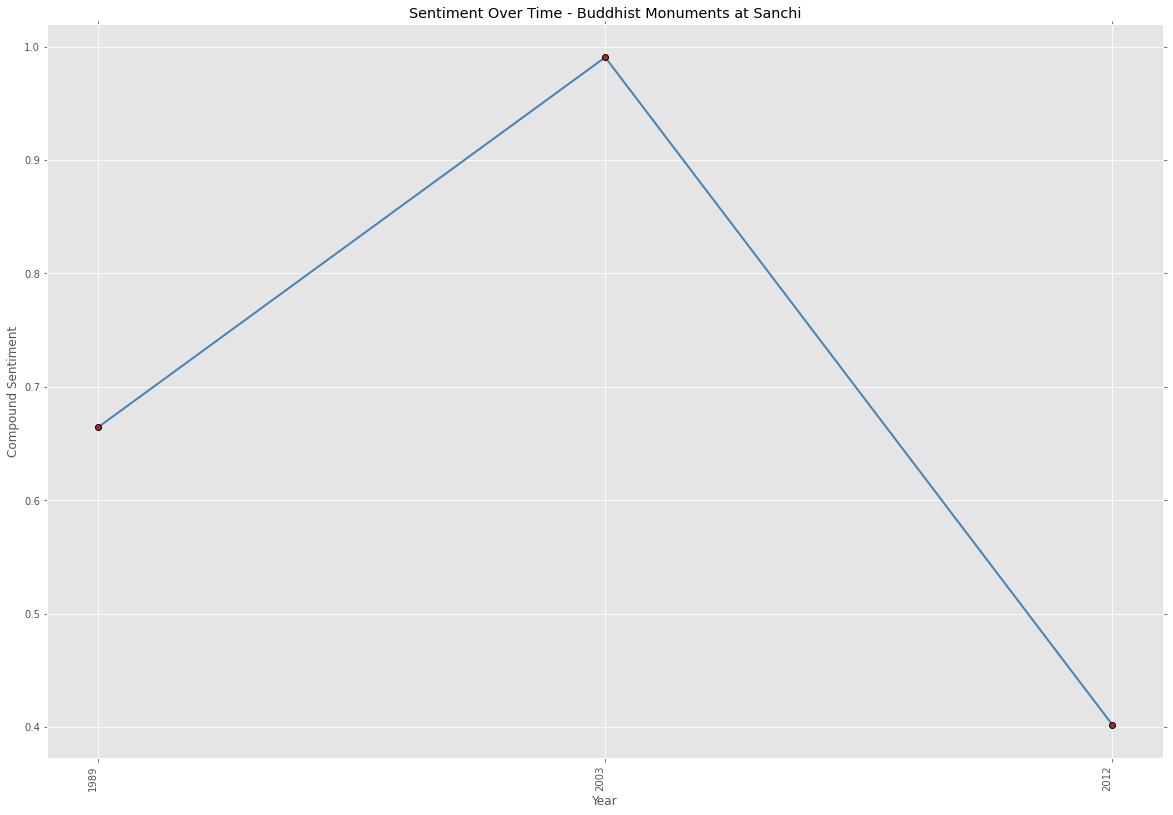

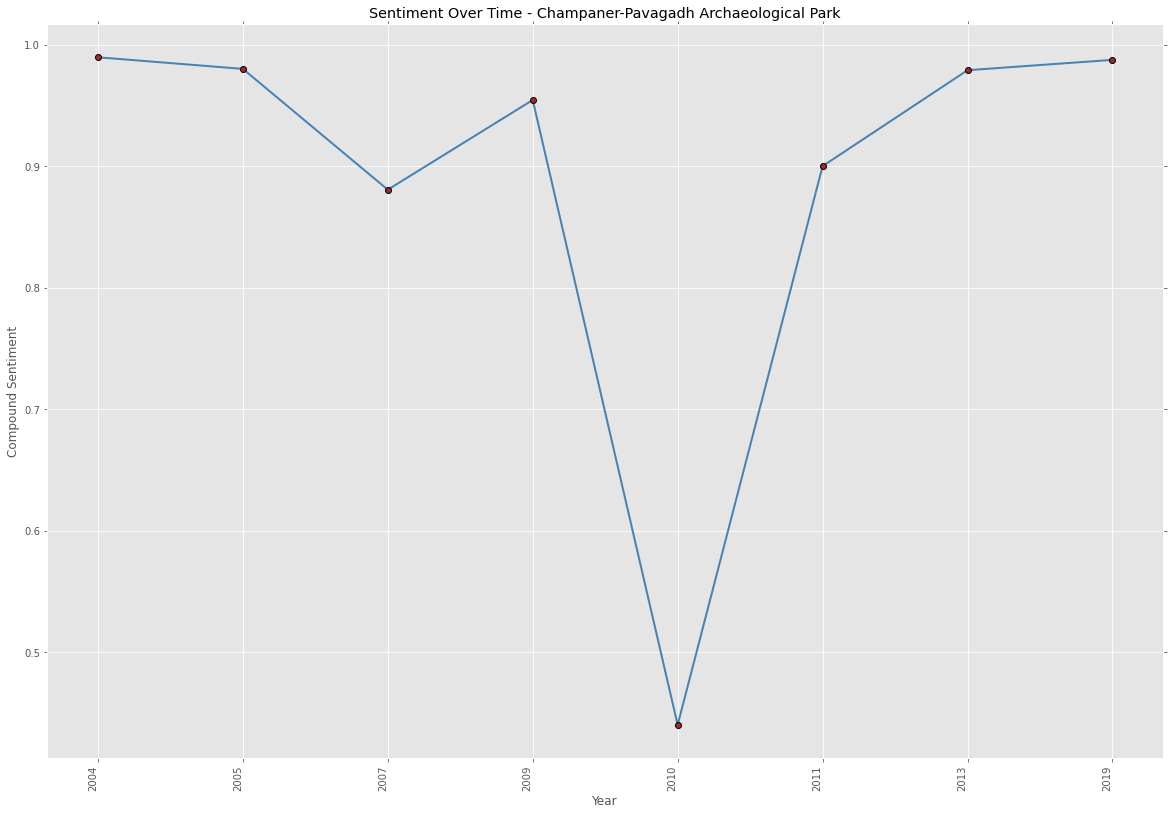

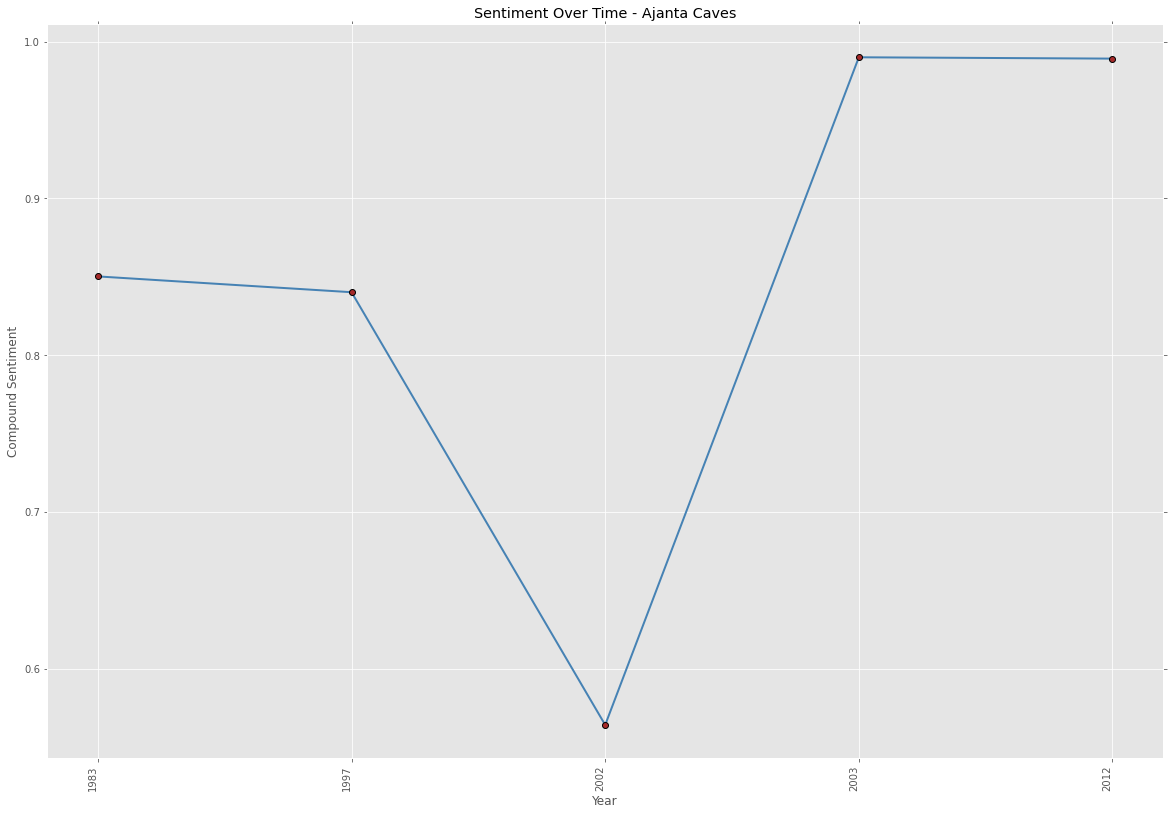

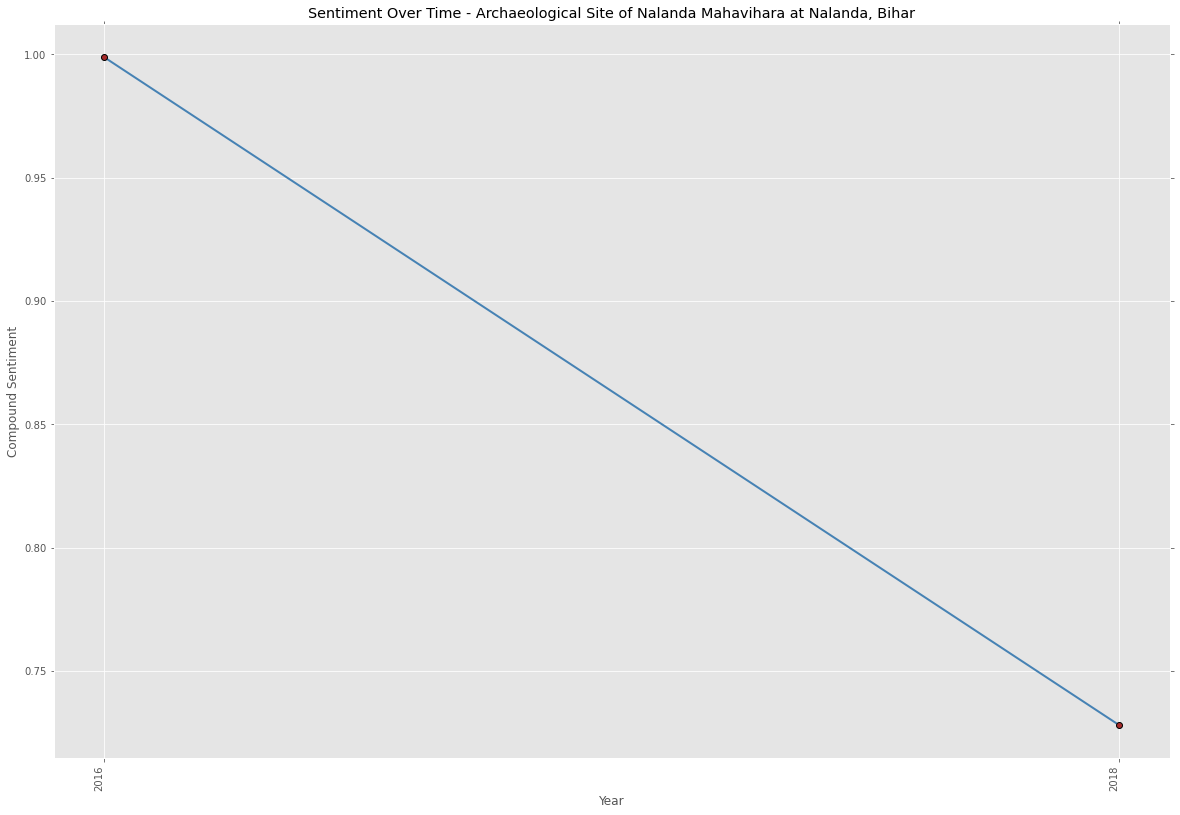

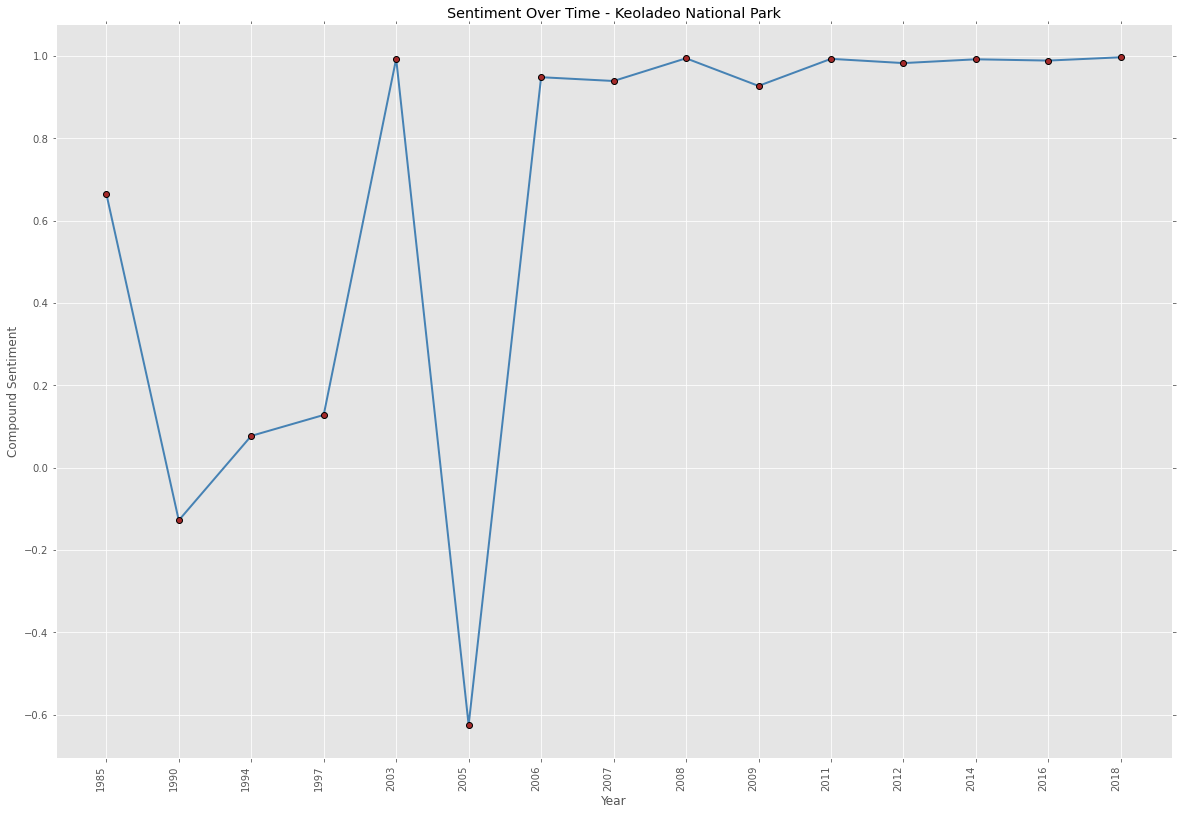

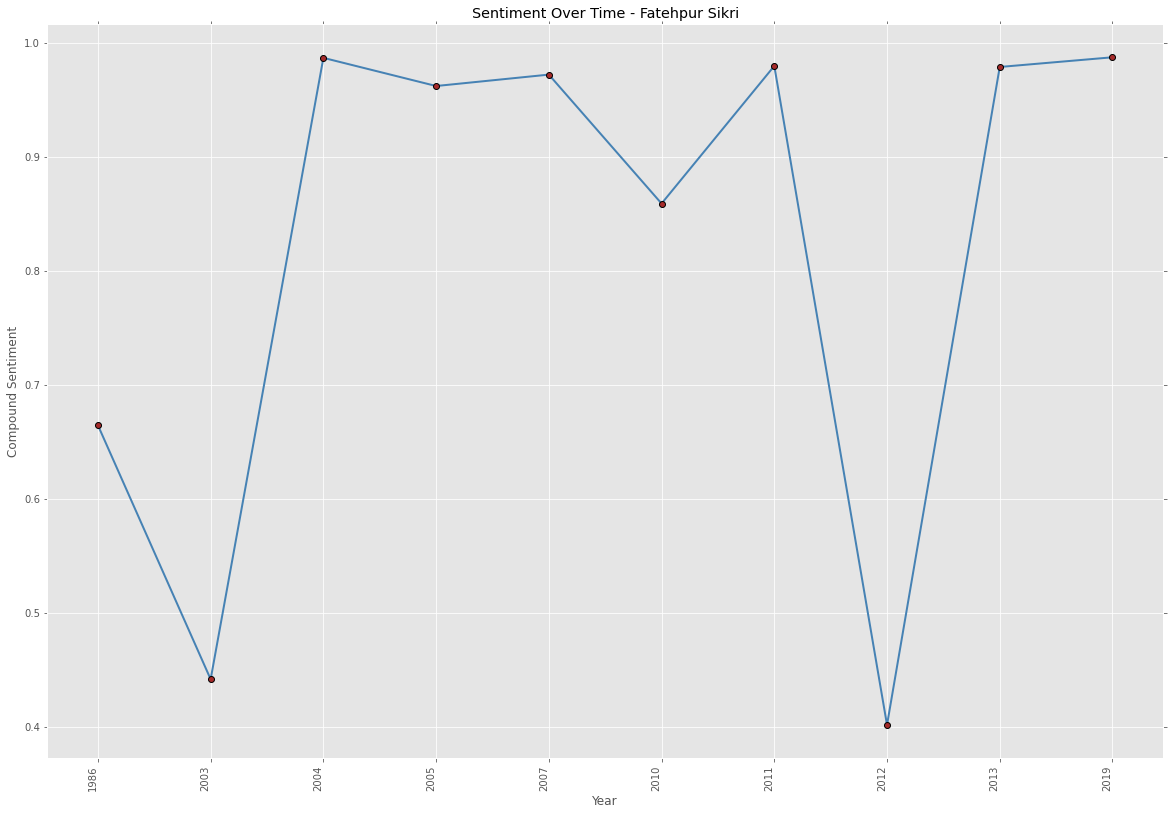

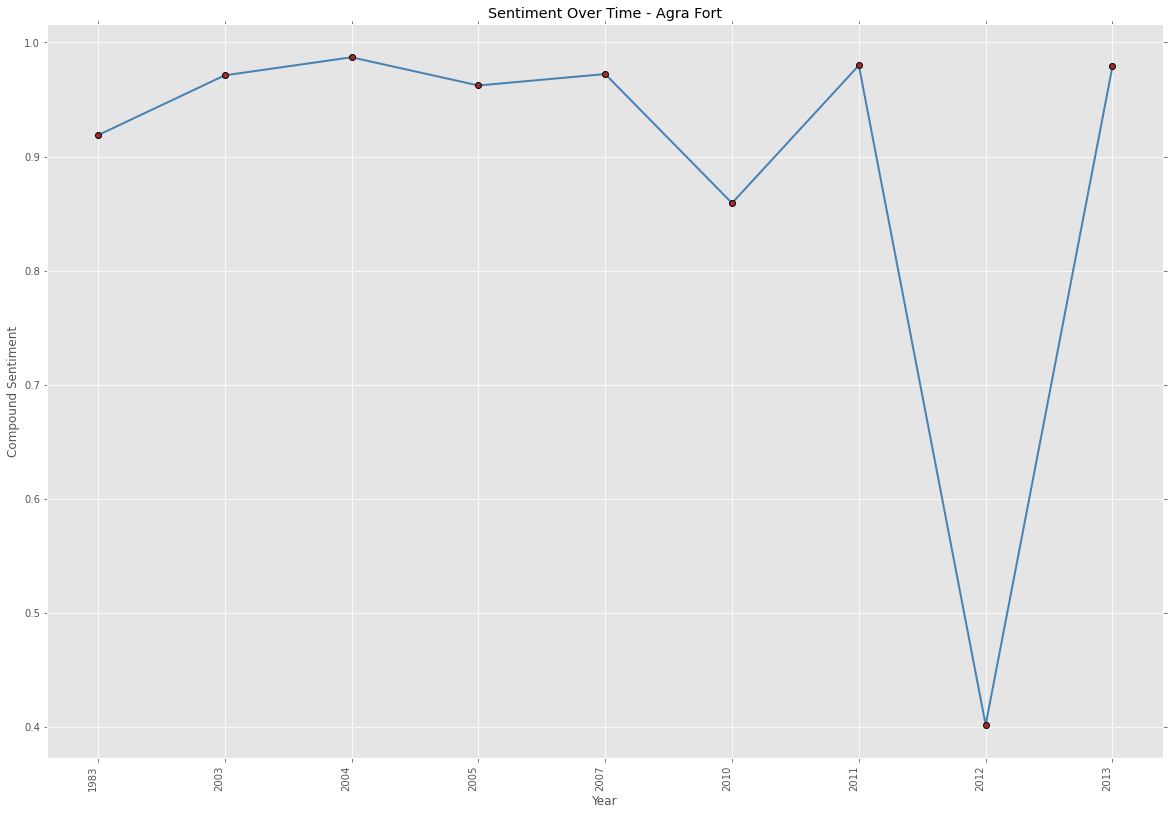

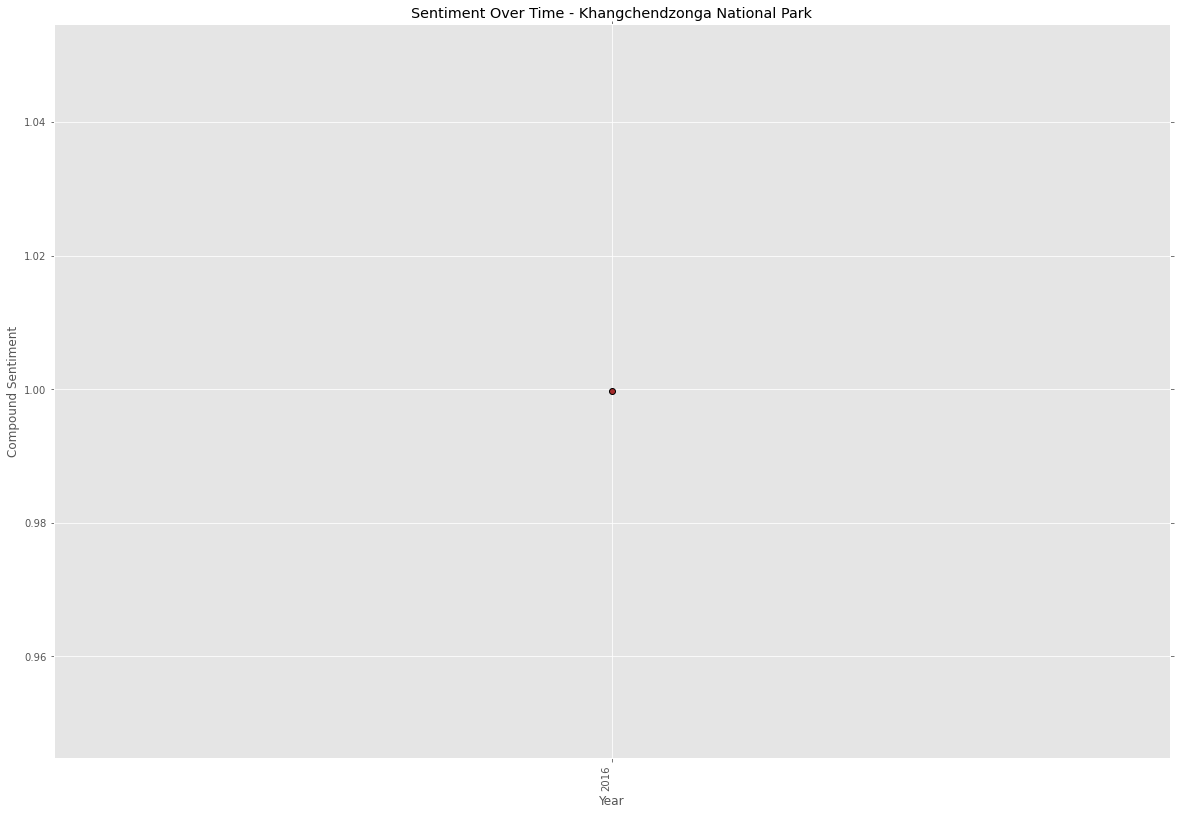

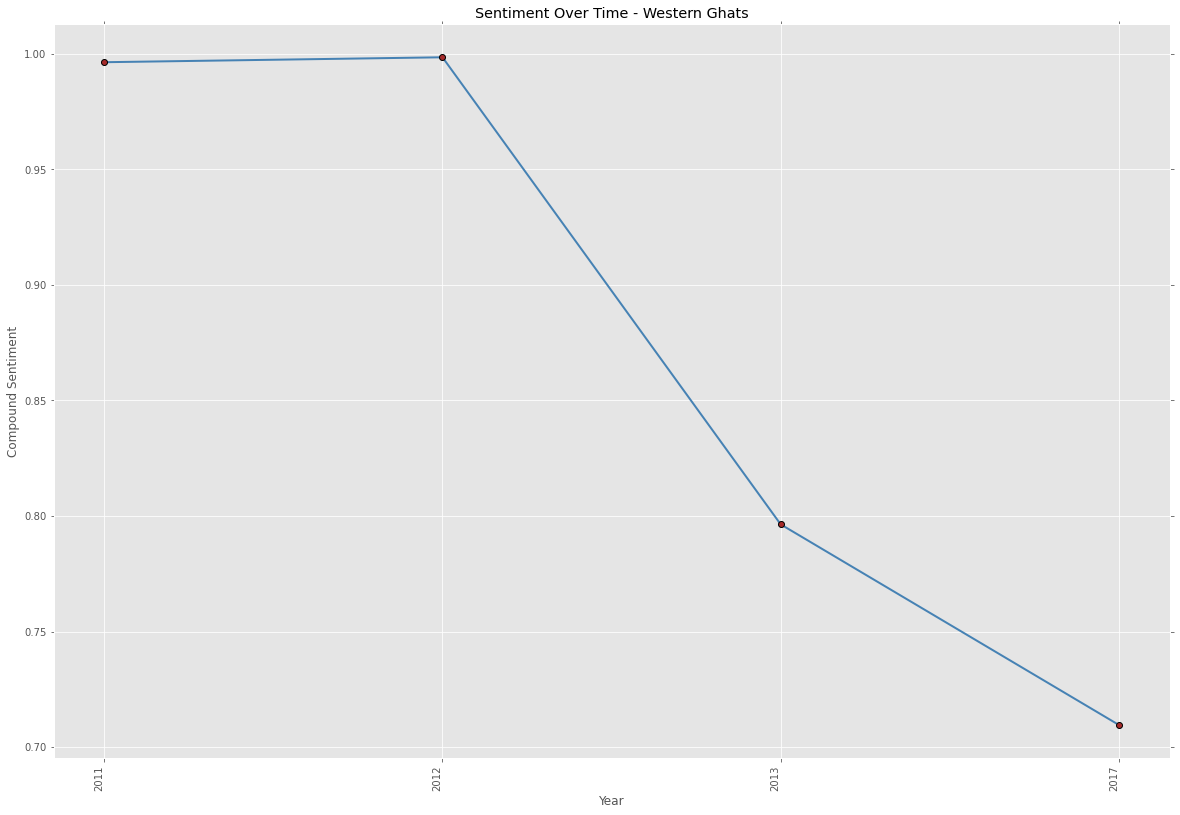

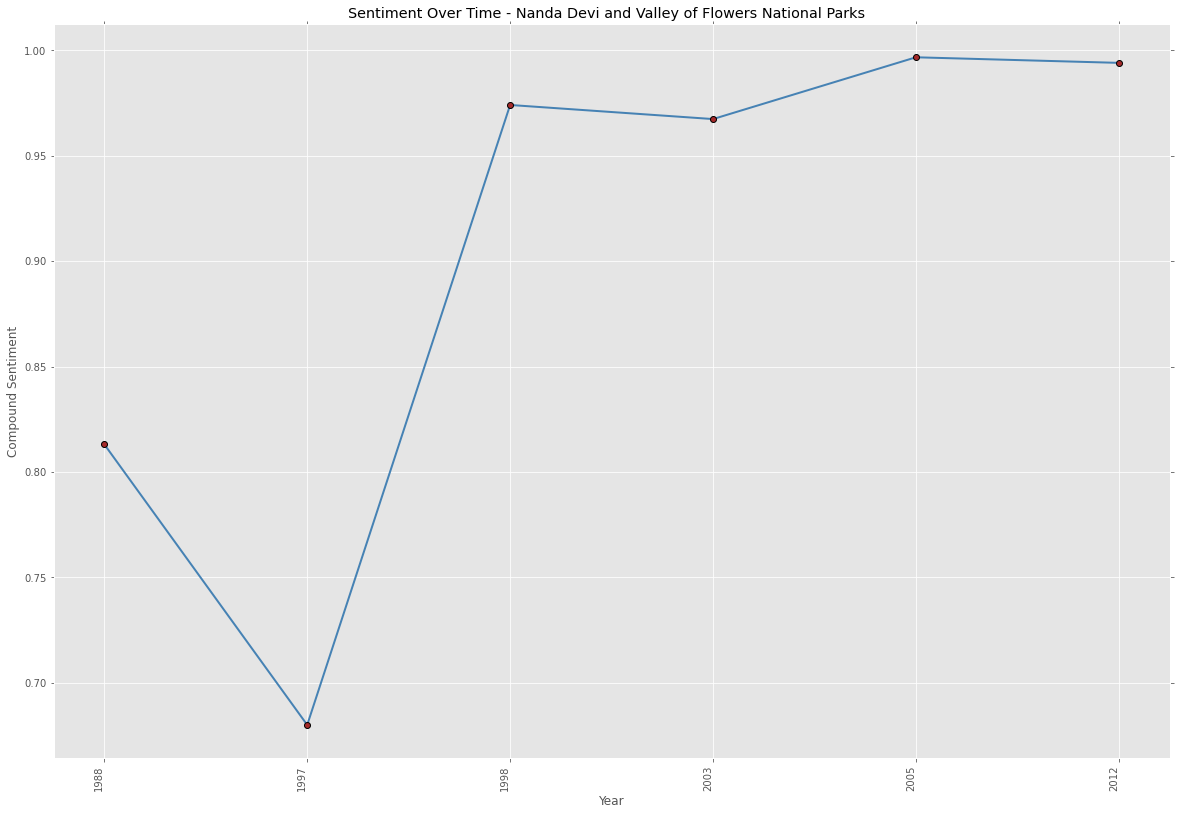

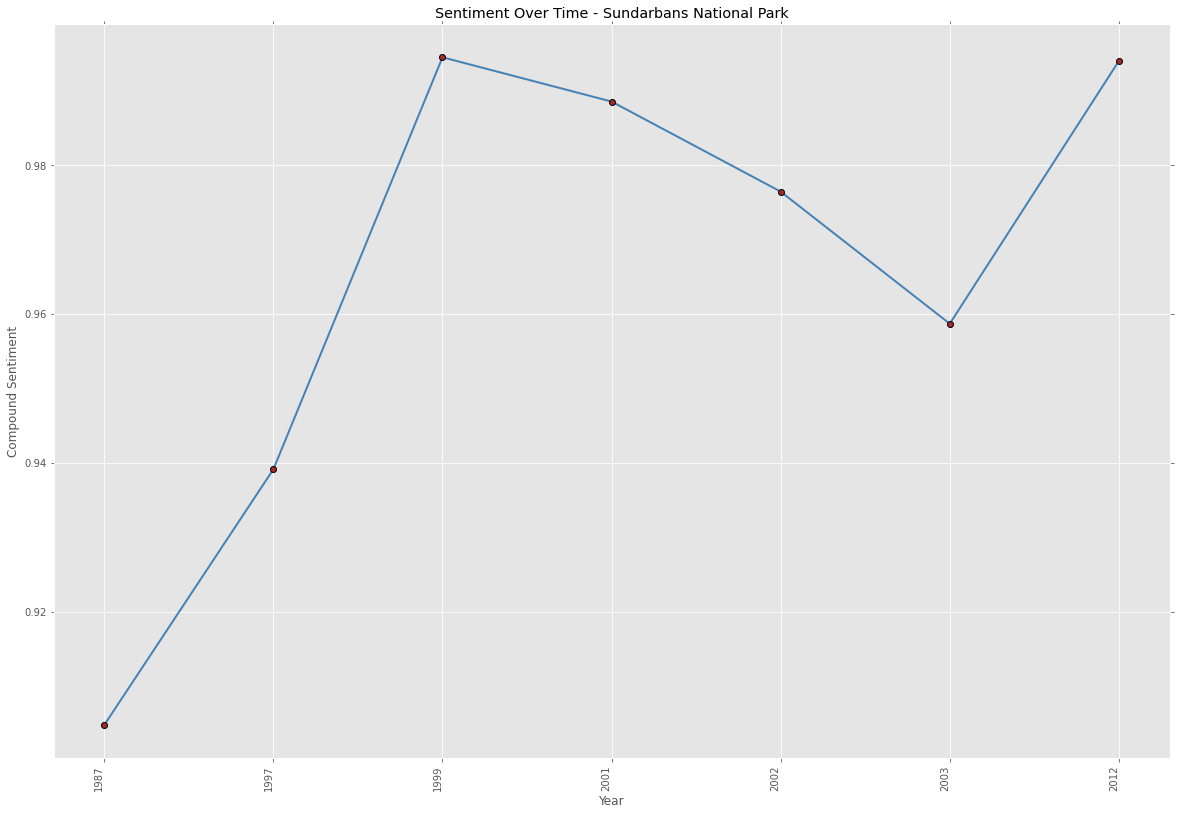

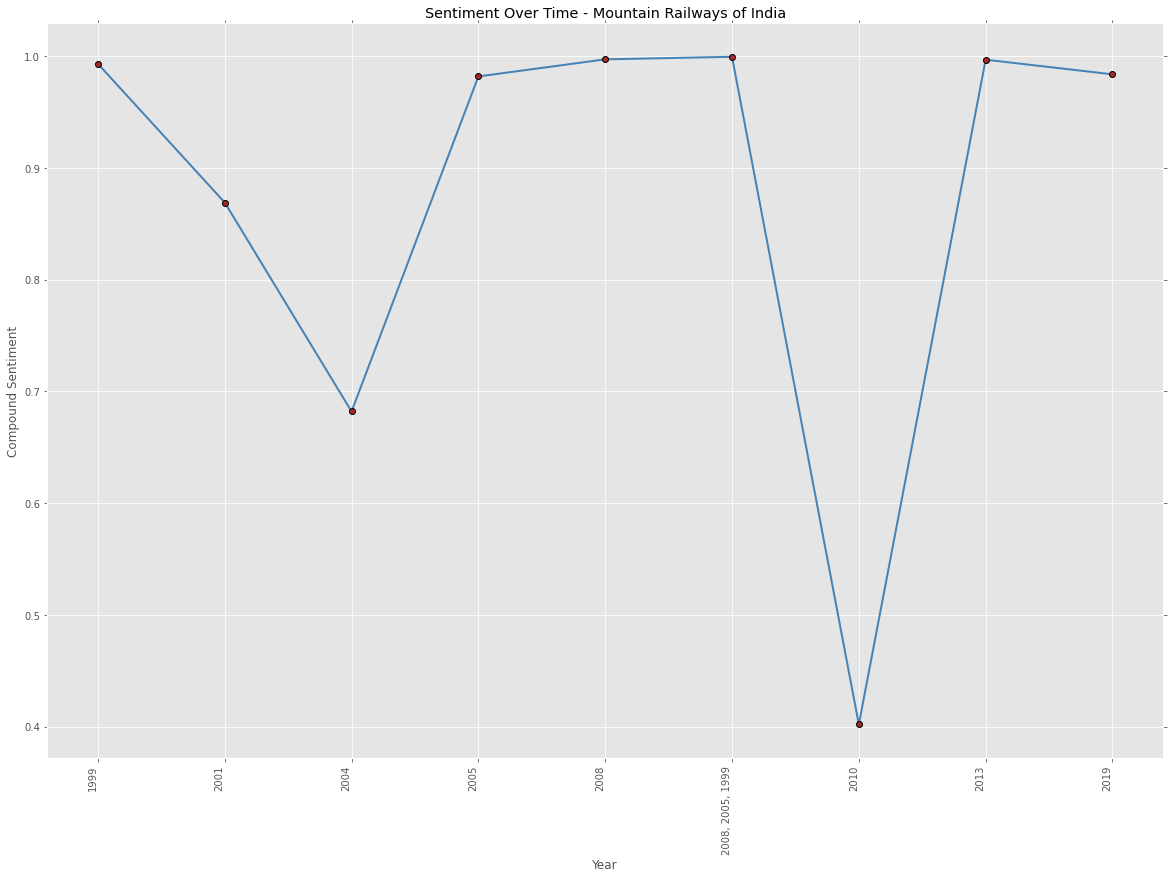

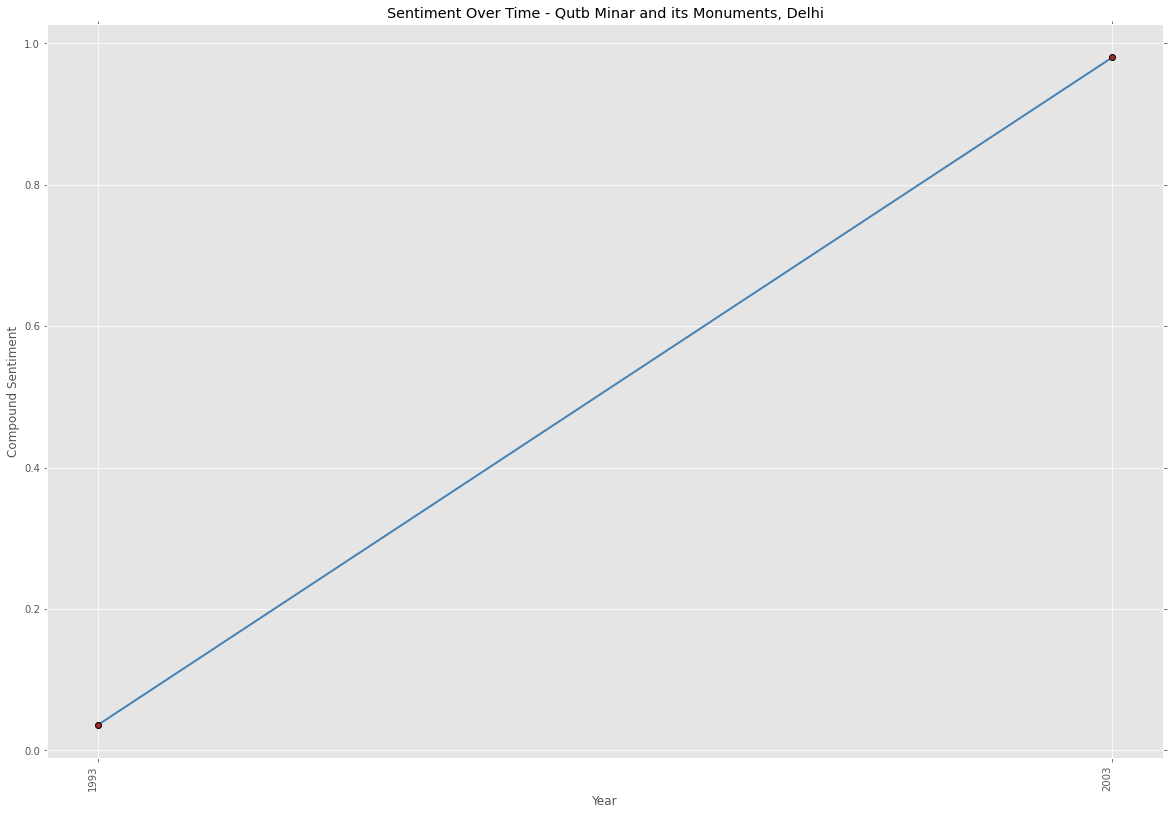

C:\Users\86138\AppData\Roaming\Python\Python36\site-packages\matplotlib\textpath.py:84: RuntimeWarning: Glyph 37413 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\86138\AppData\Roaming\Python\Python36\site-packages\matplotlib\textpath.py:84: RuntimeWarning: Glyph 27290 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\86138\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 37413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\86138\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 27290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\86138\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 37413 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\86138\AppData\Roaming\Python\Pytho

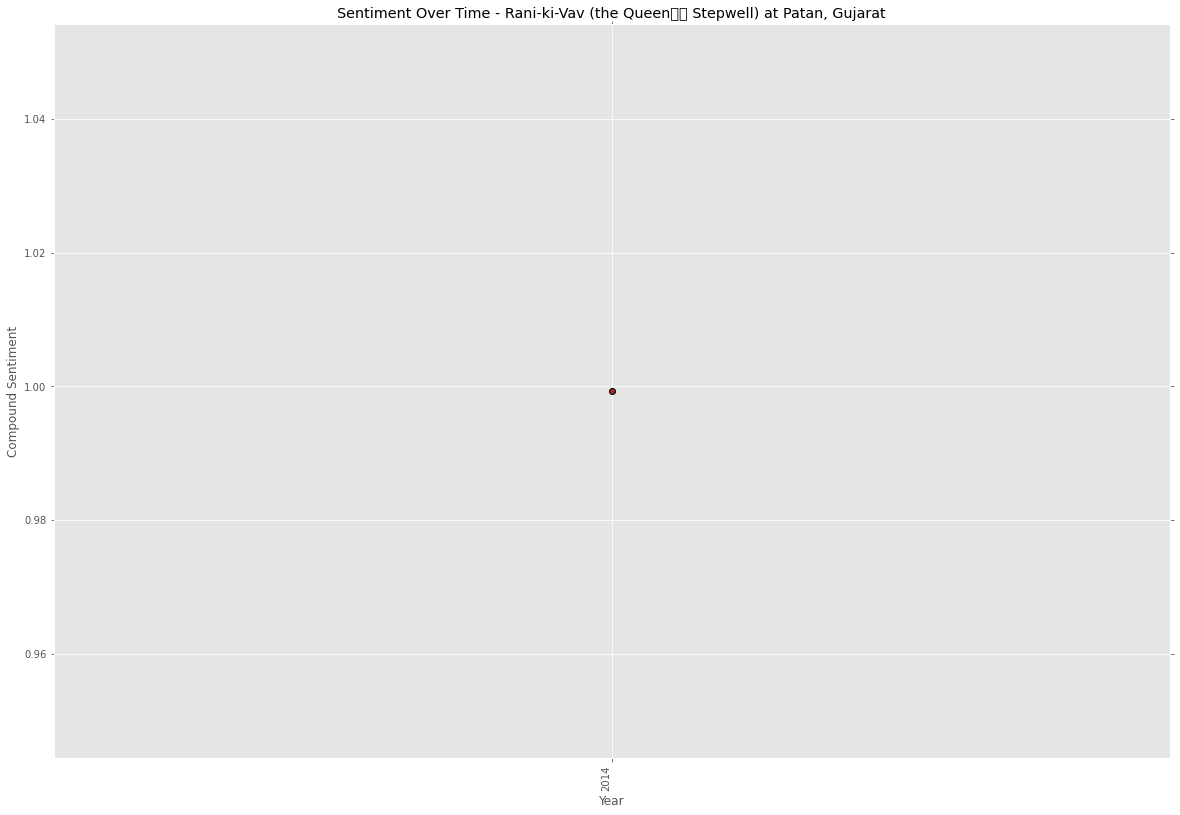

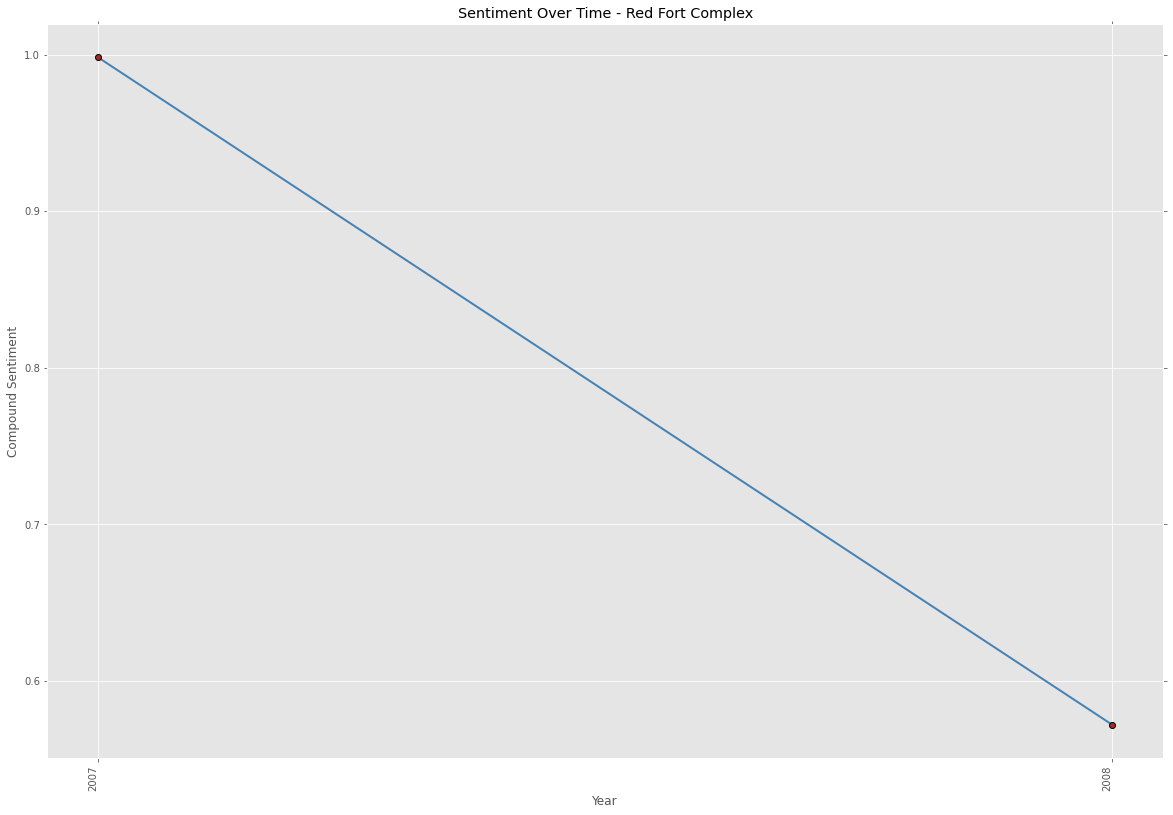

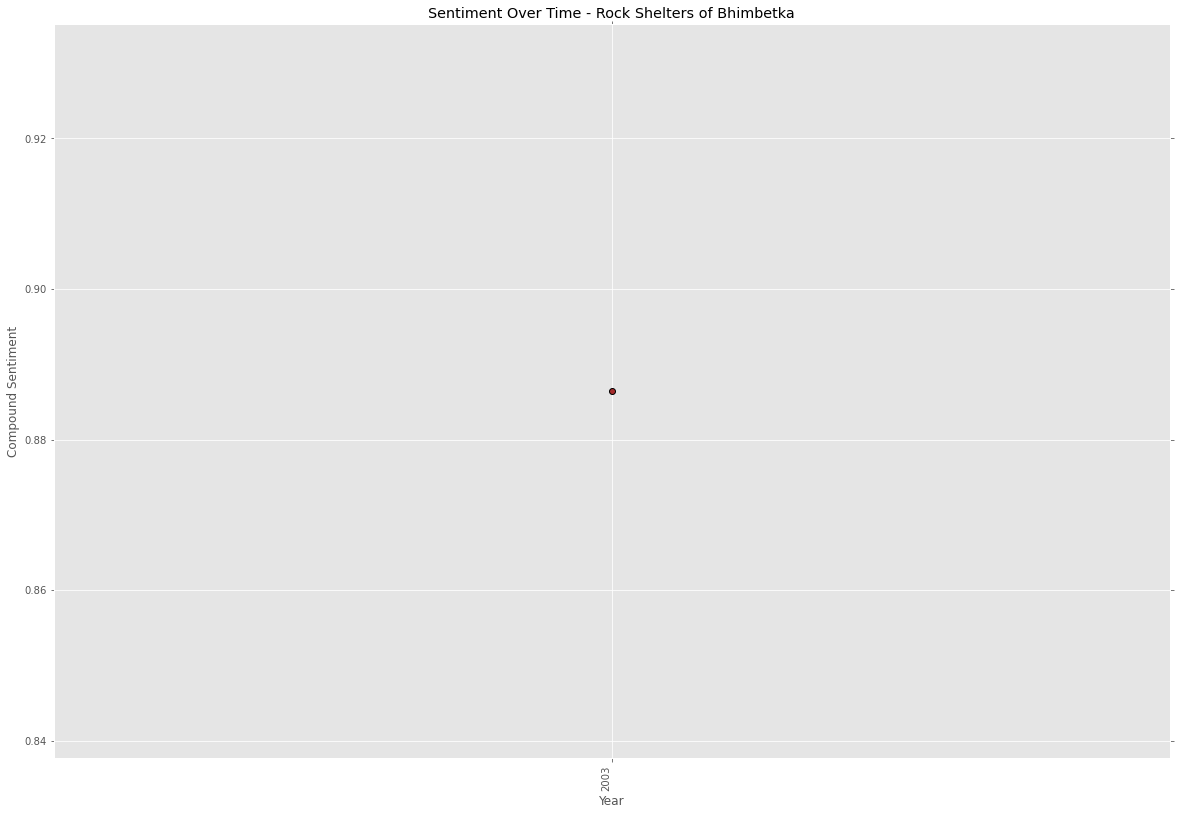

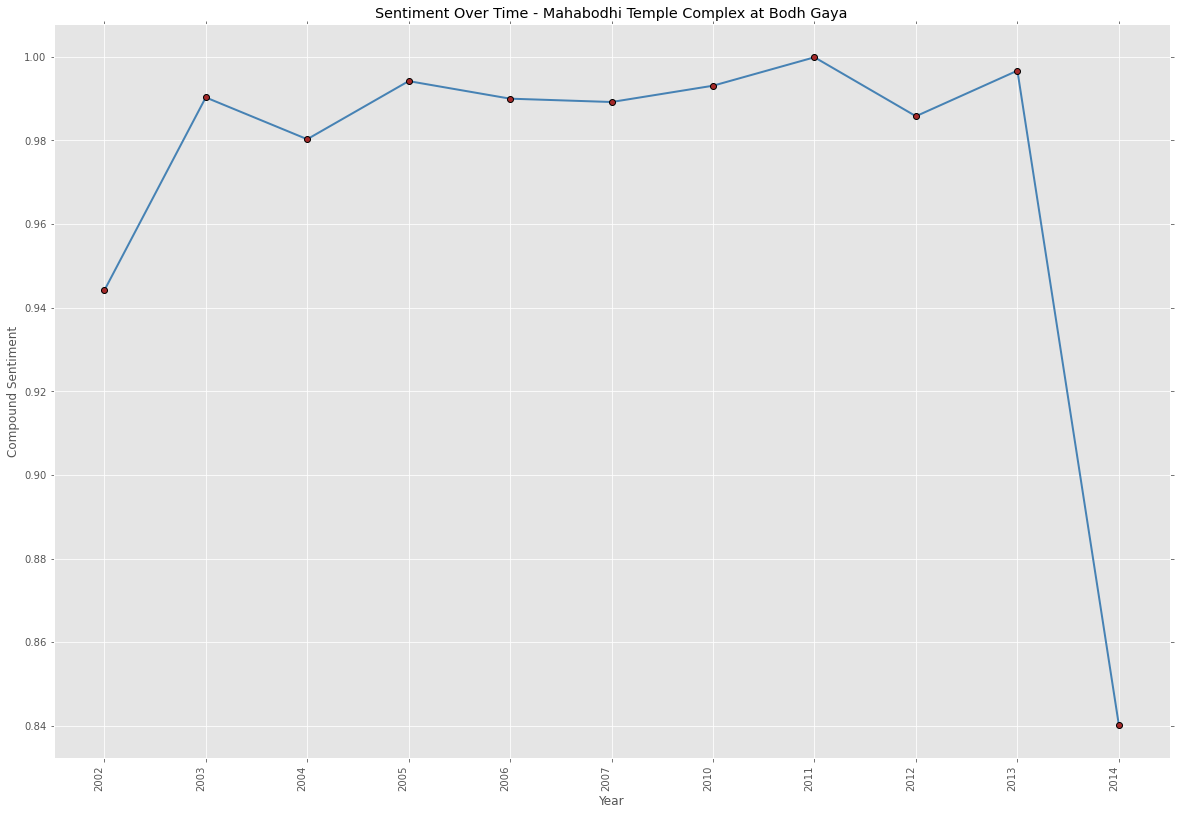

C:\Users\86138\AppData\Roaming\Python\Python36\site-packages\matplotlib\textpath.py:84: RuntimeWarning: Glyph 33426 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\86138\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 33426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\86138\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 33426 missing from current font.
  font.set_text(s, 0, flags=flags)


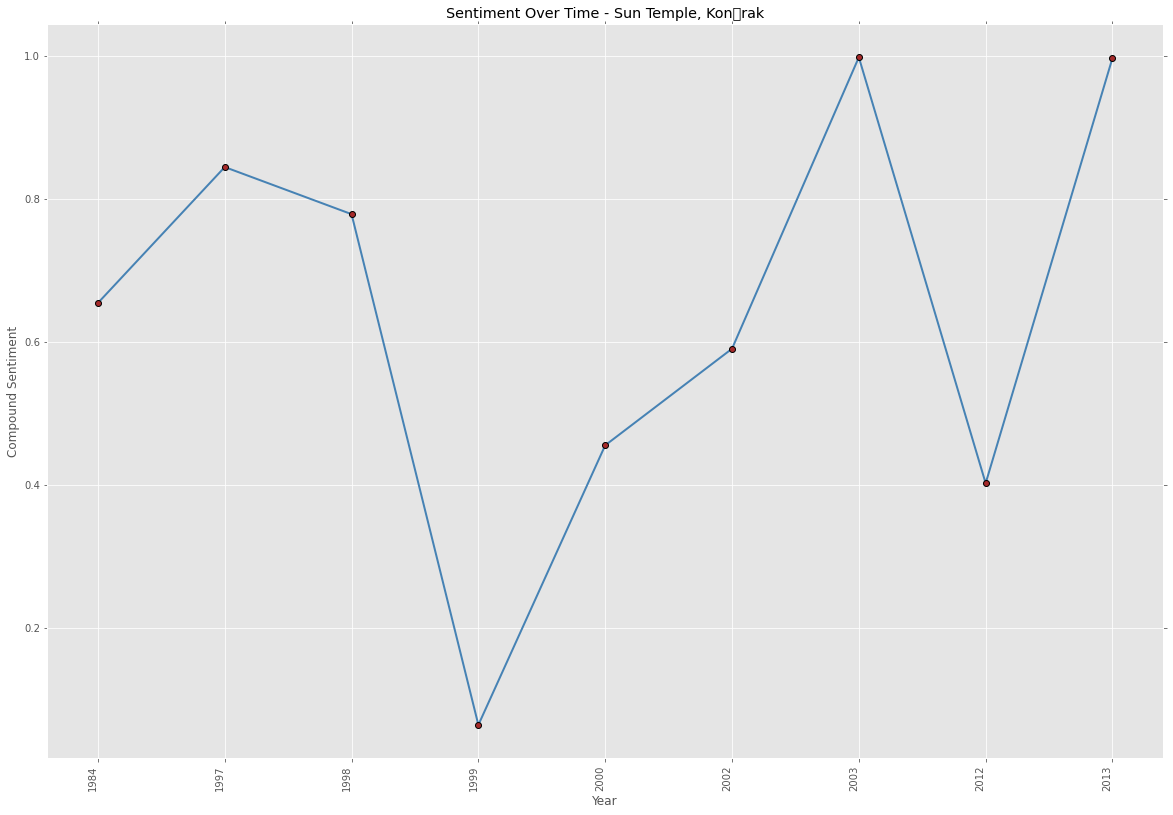

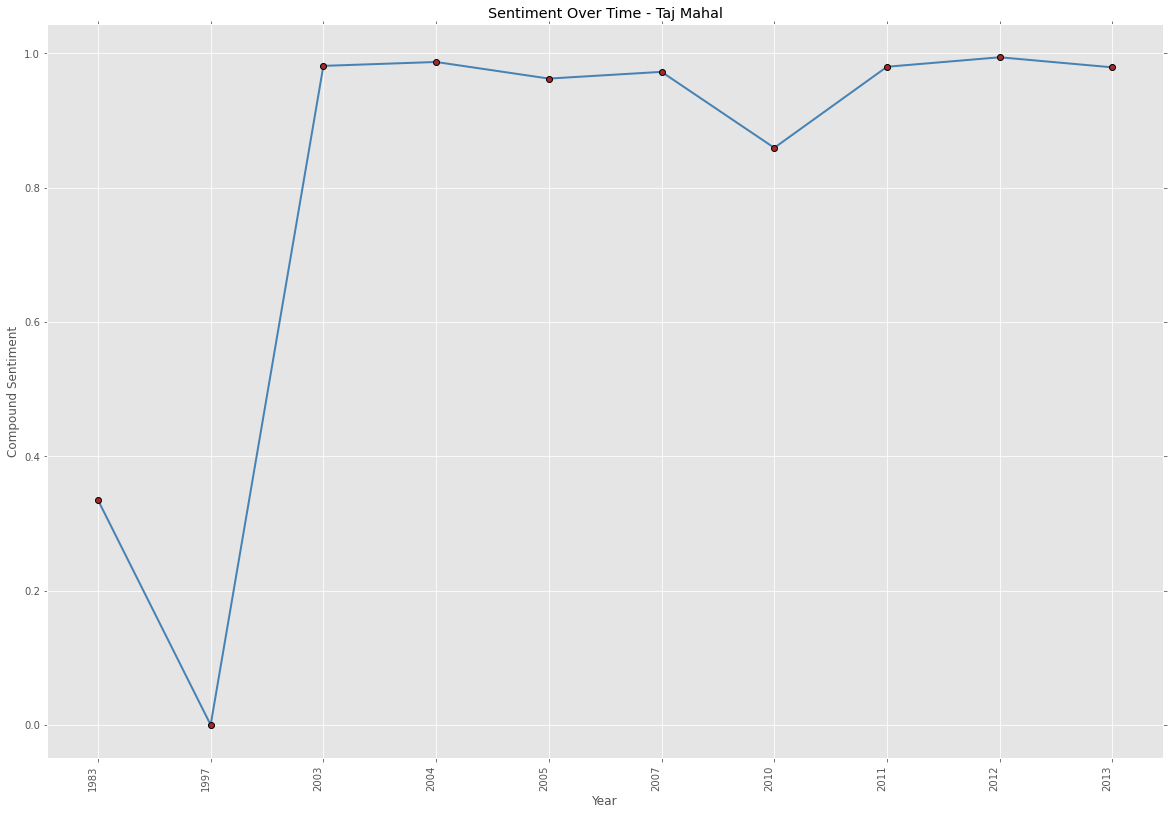

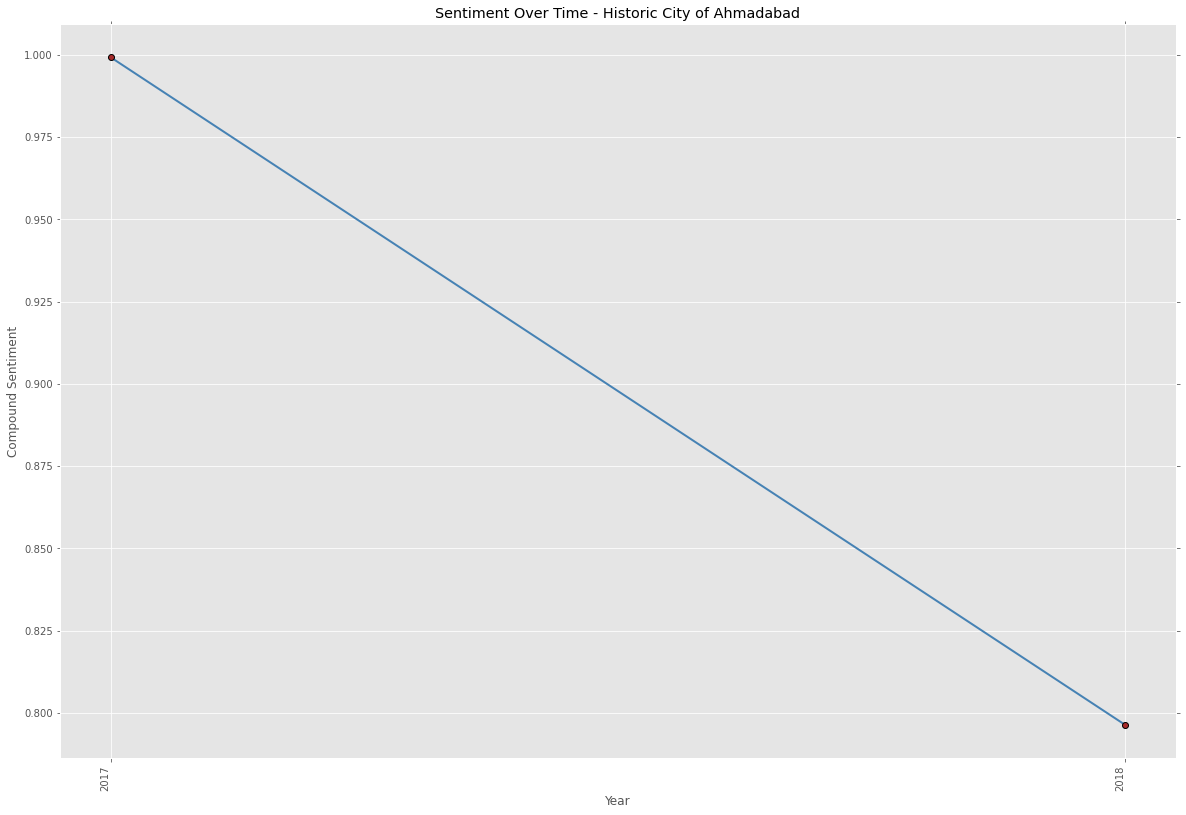

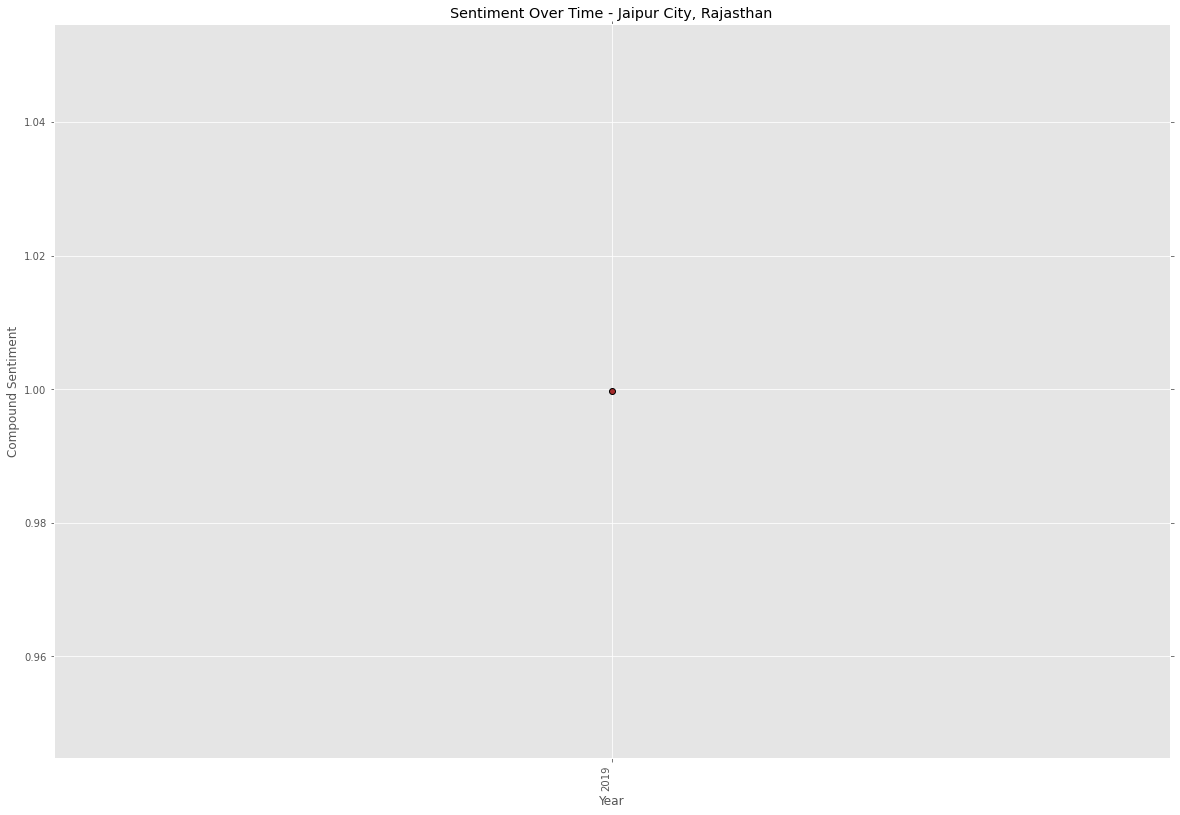

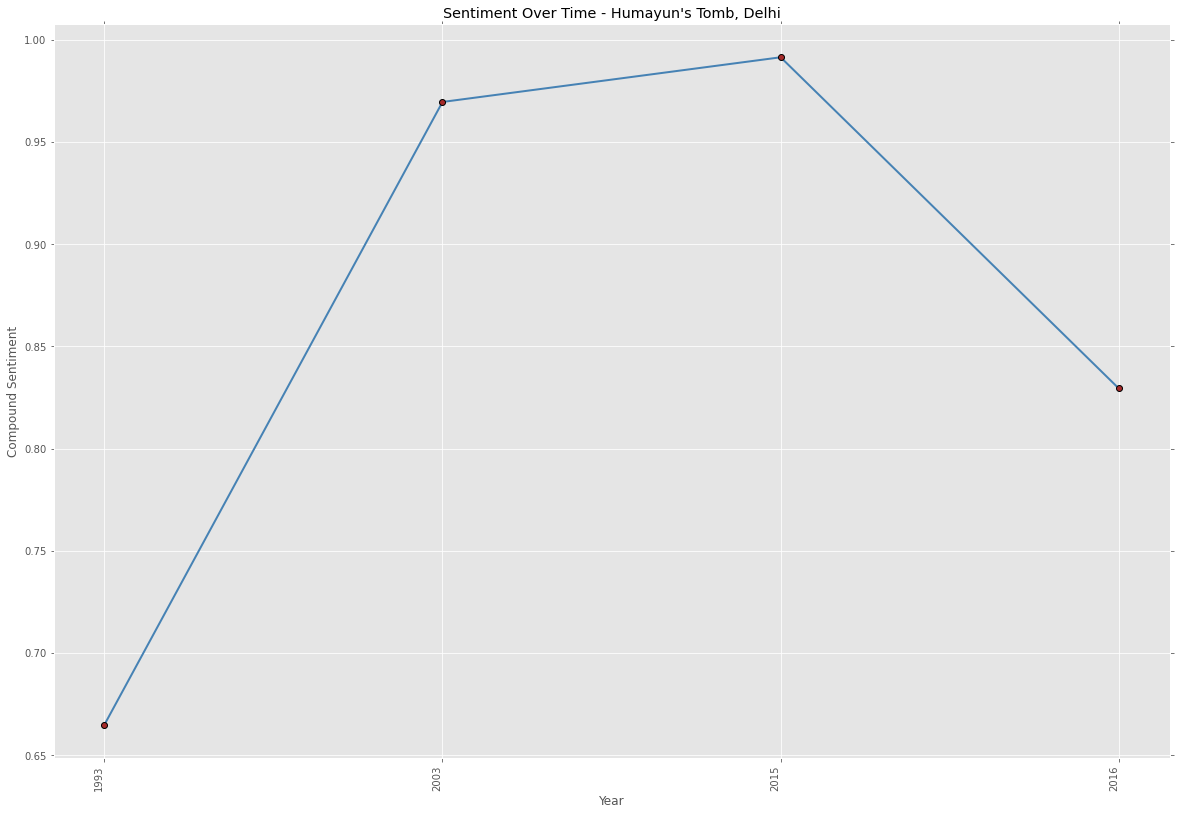

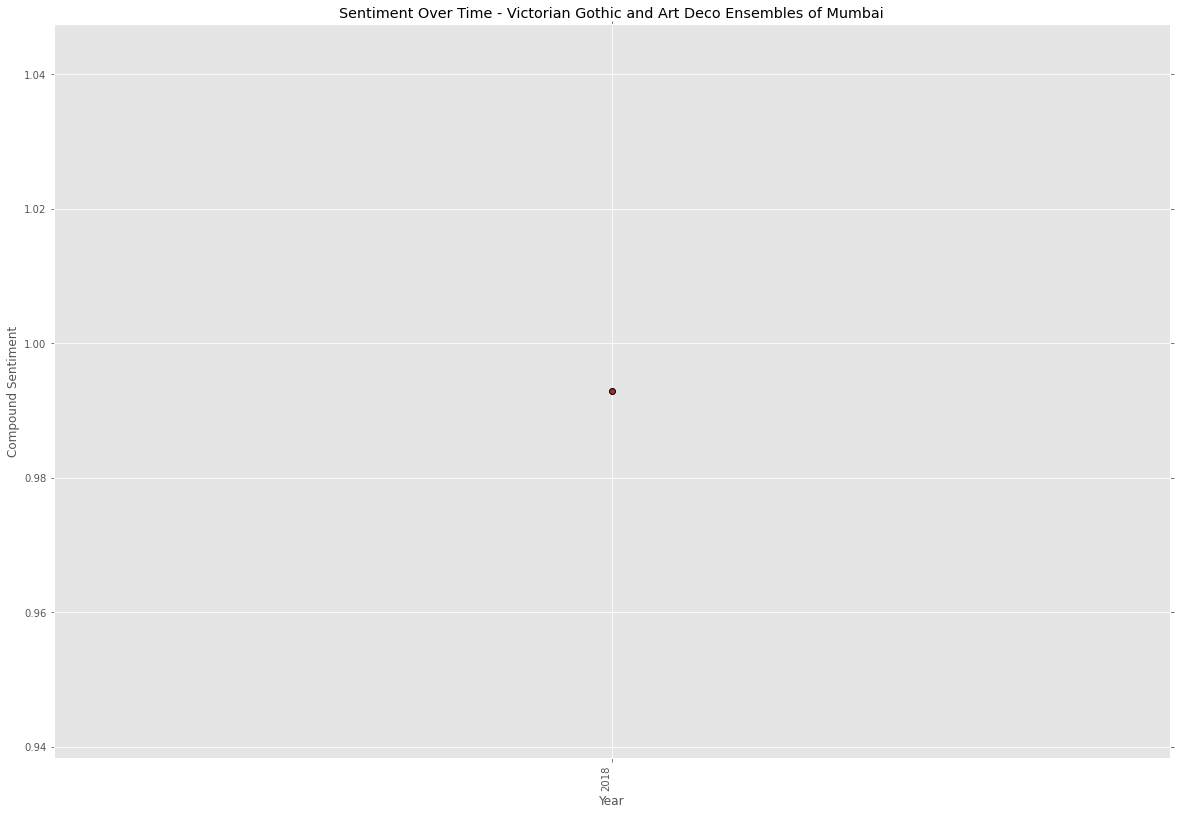

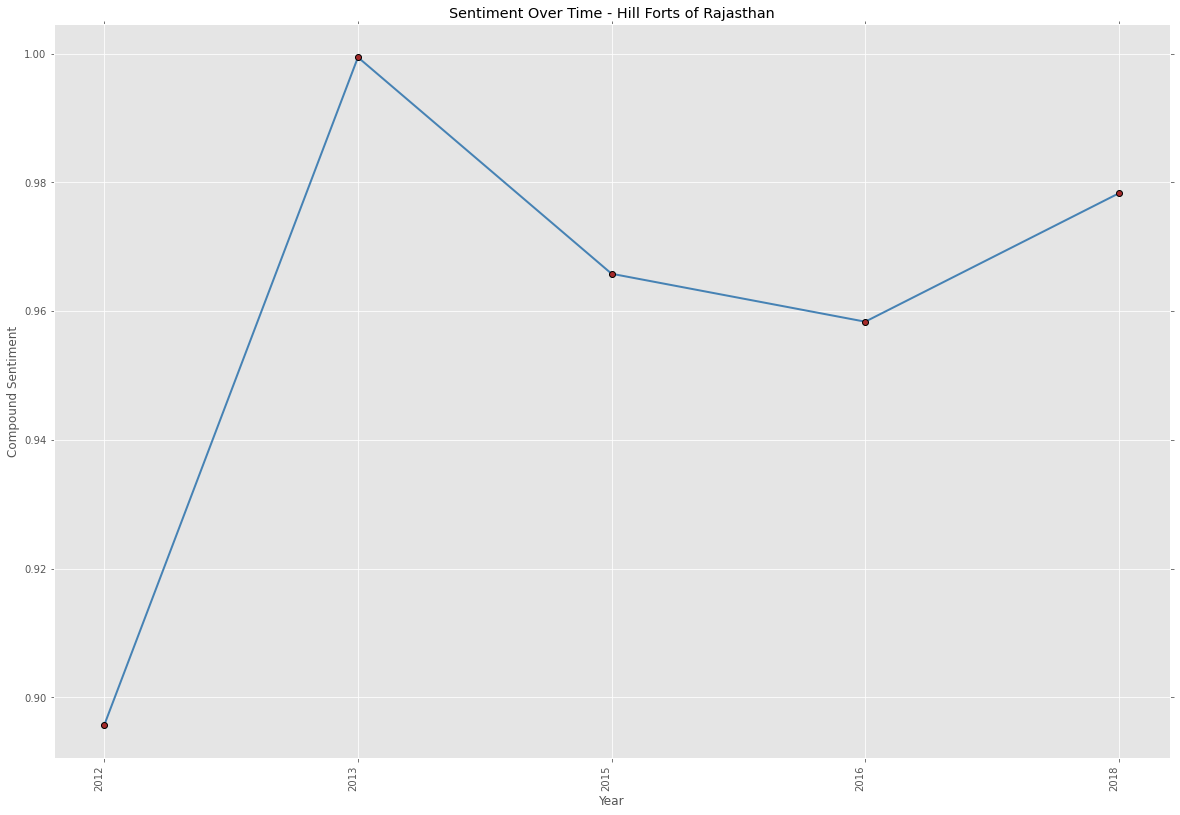

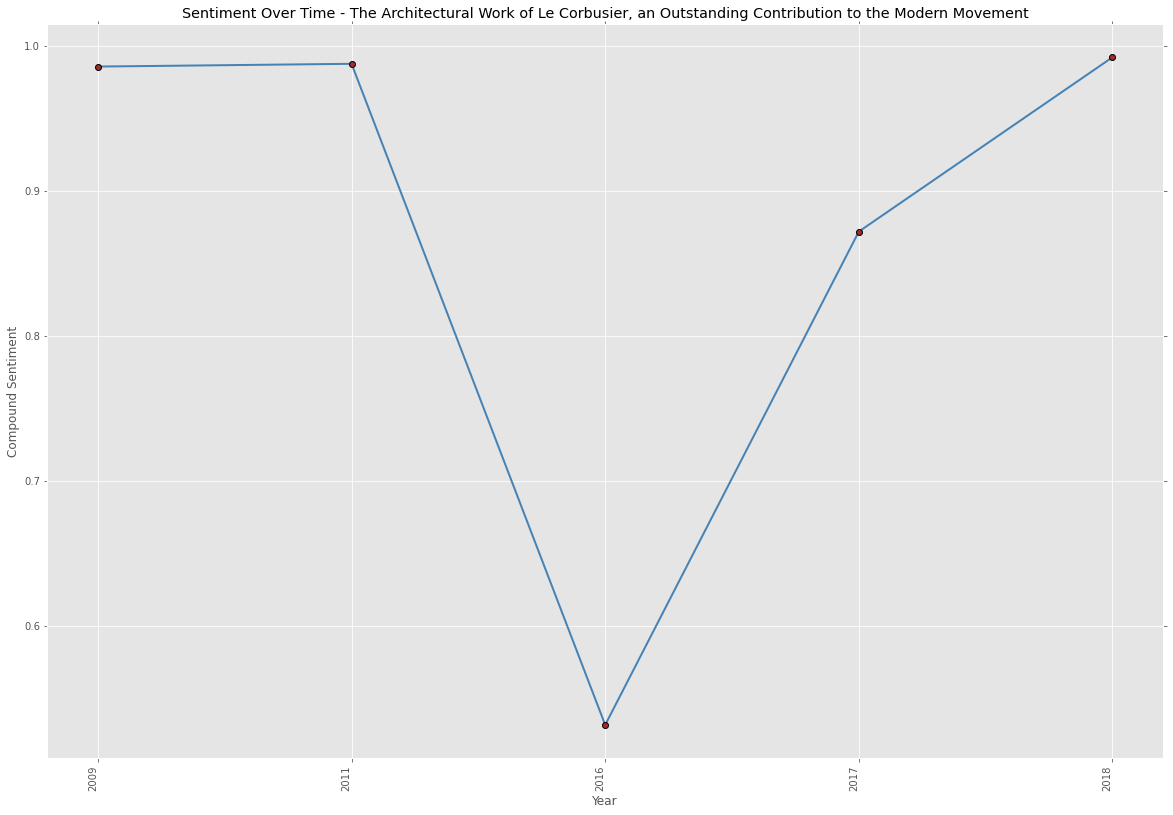

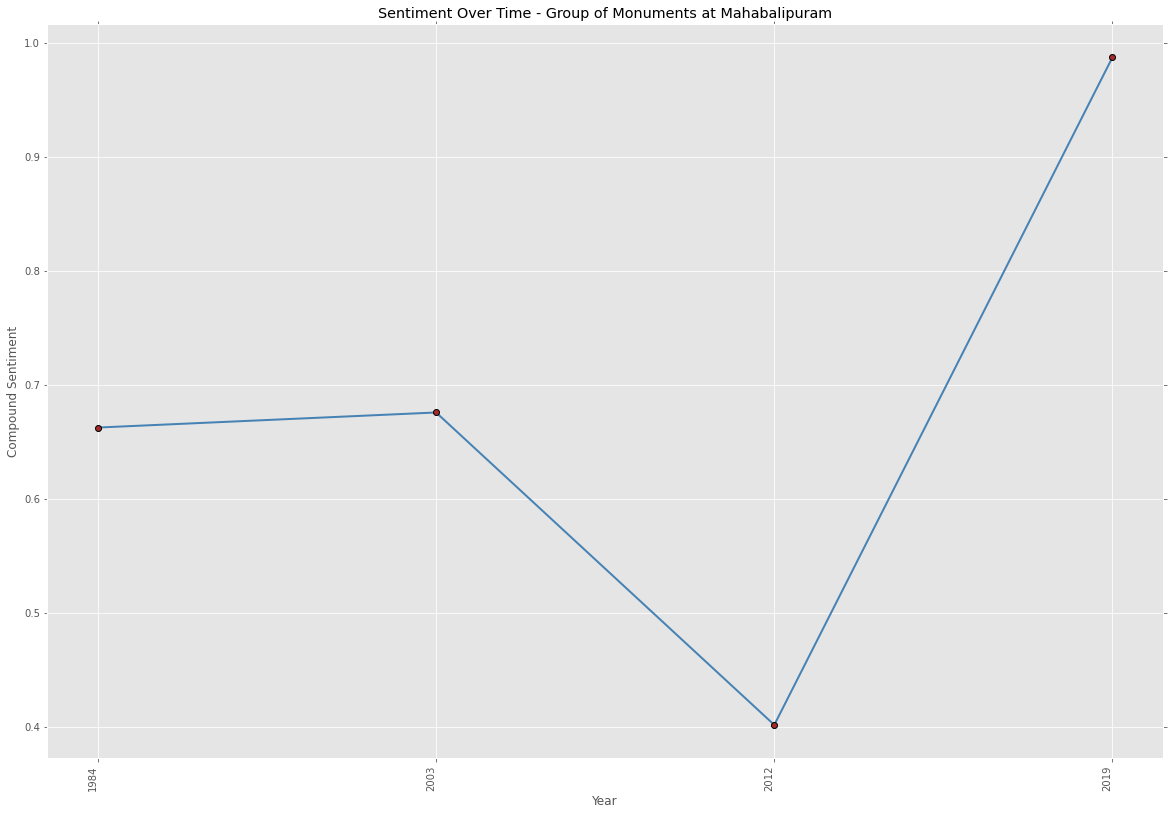

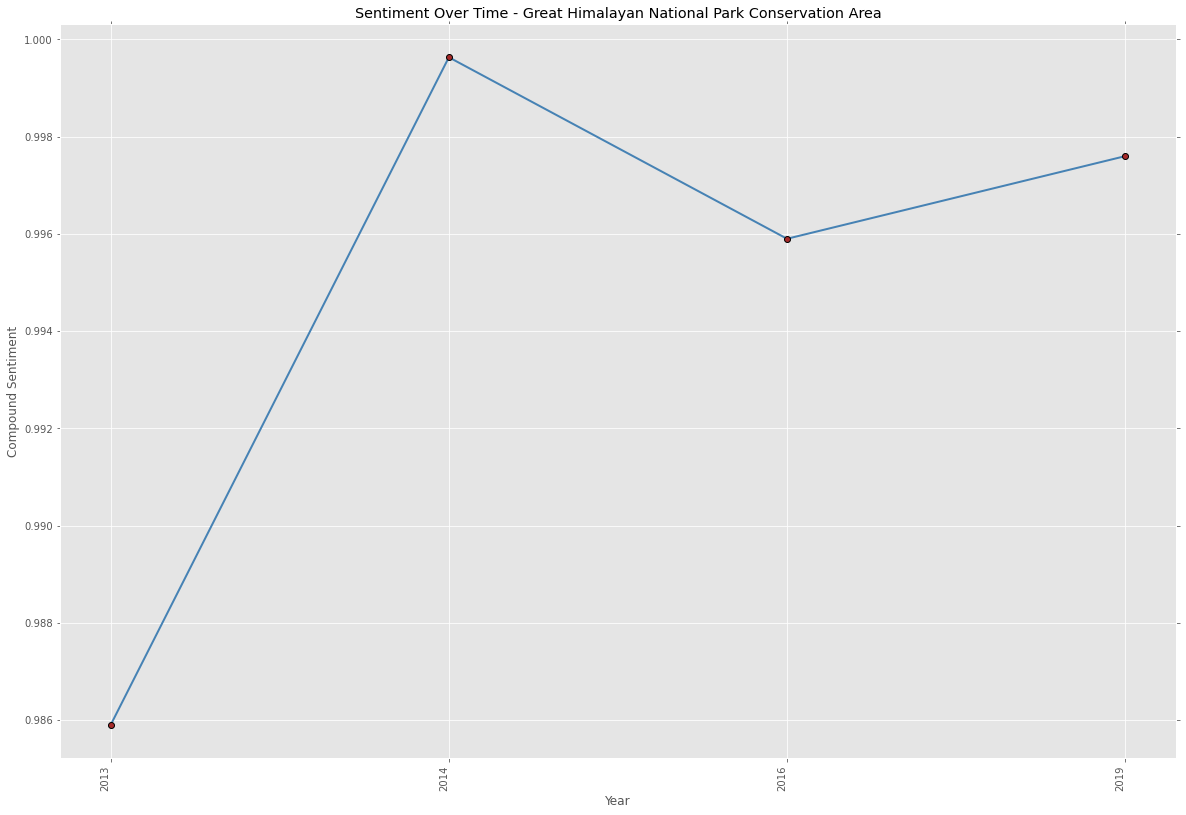

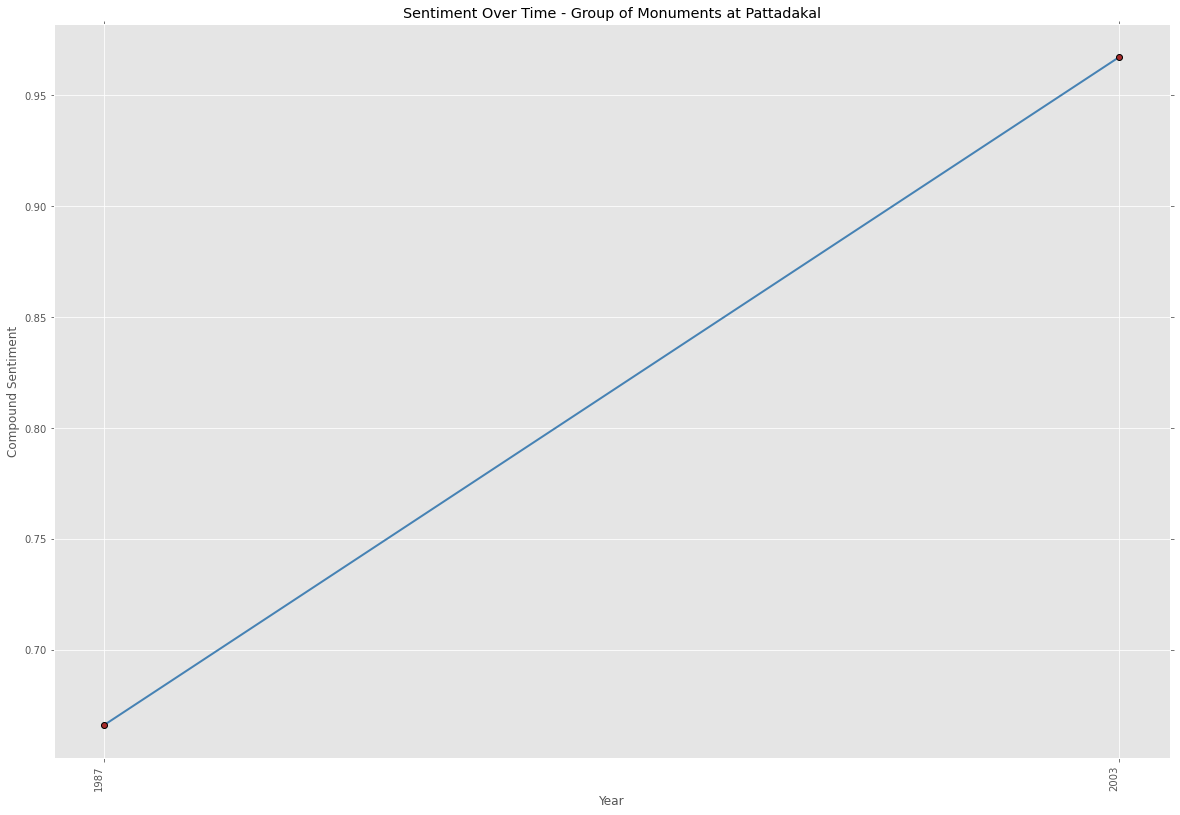

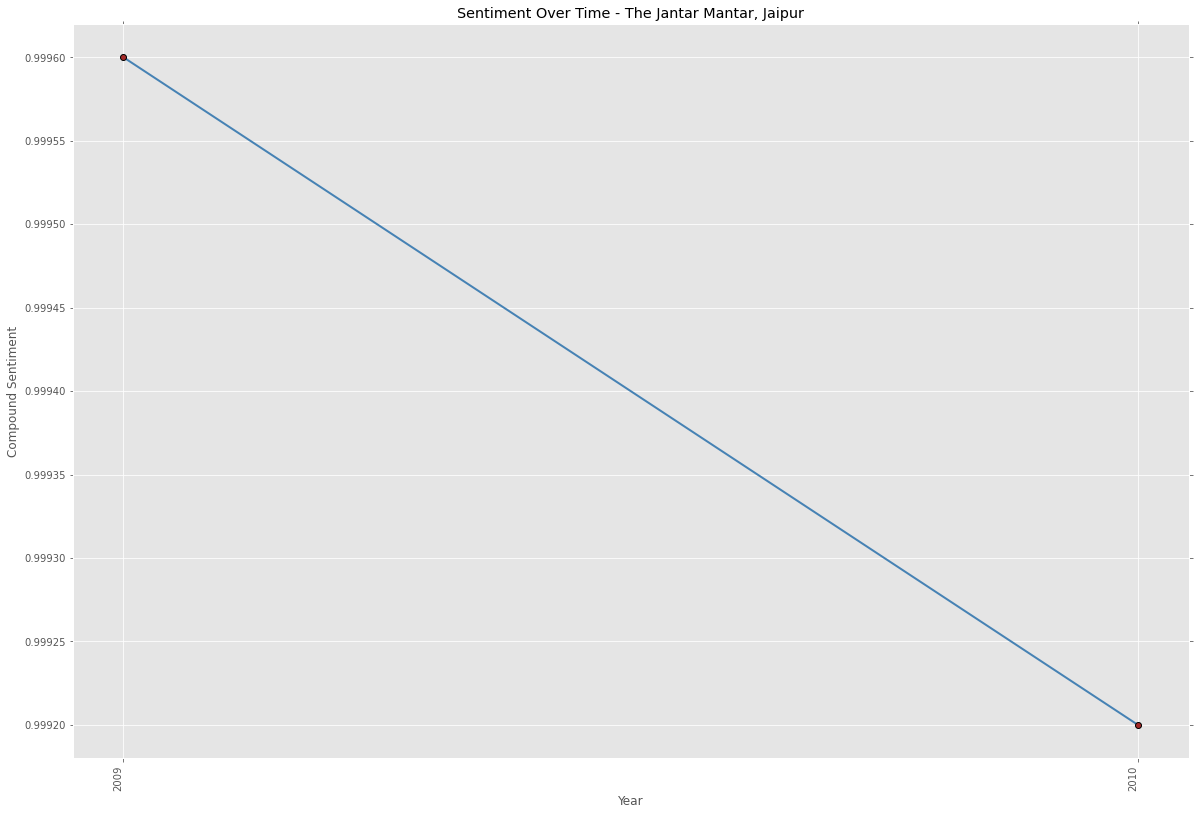

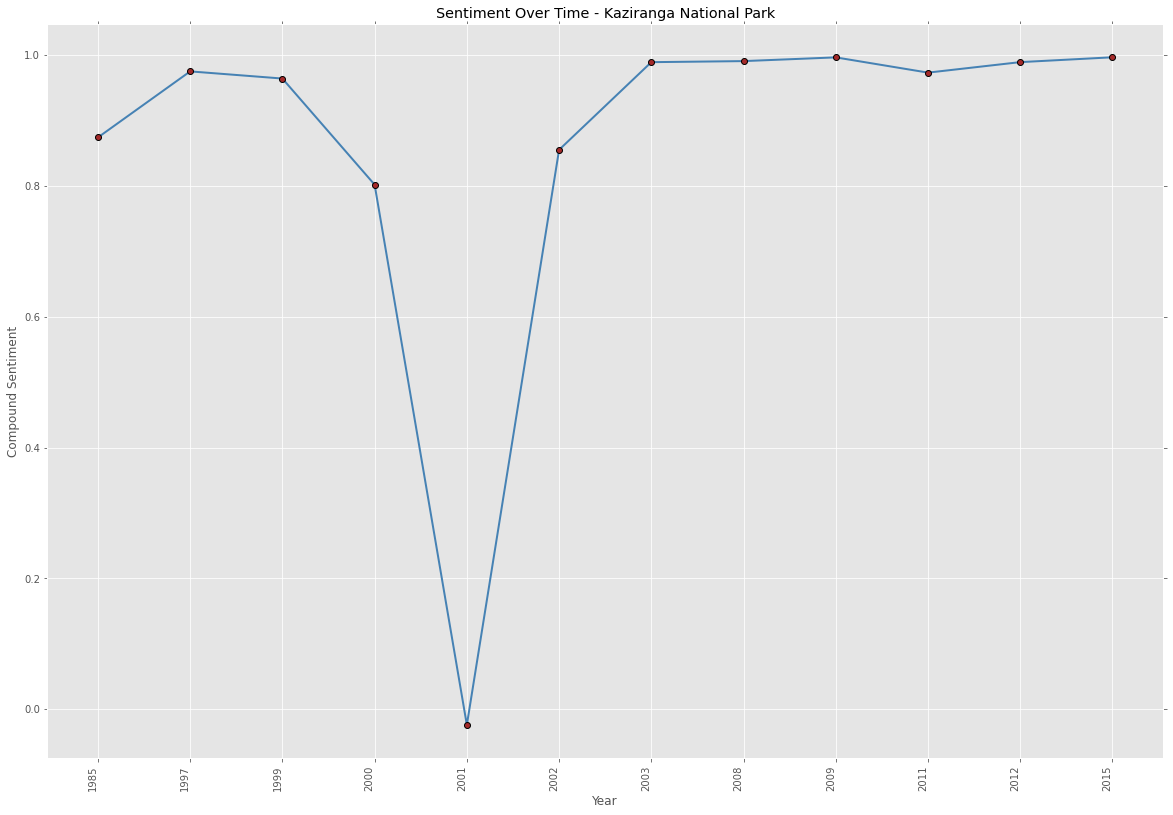

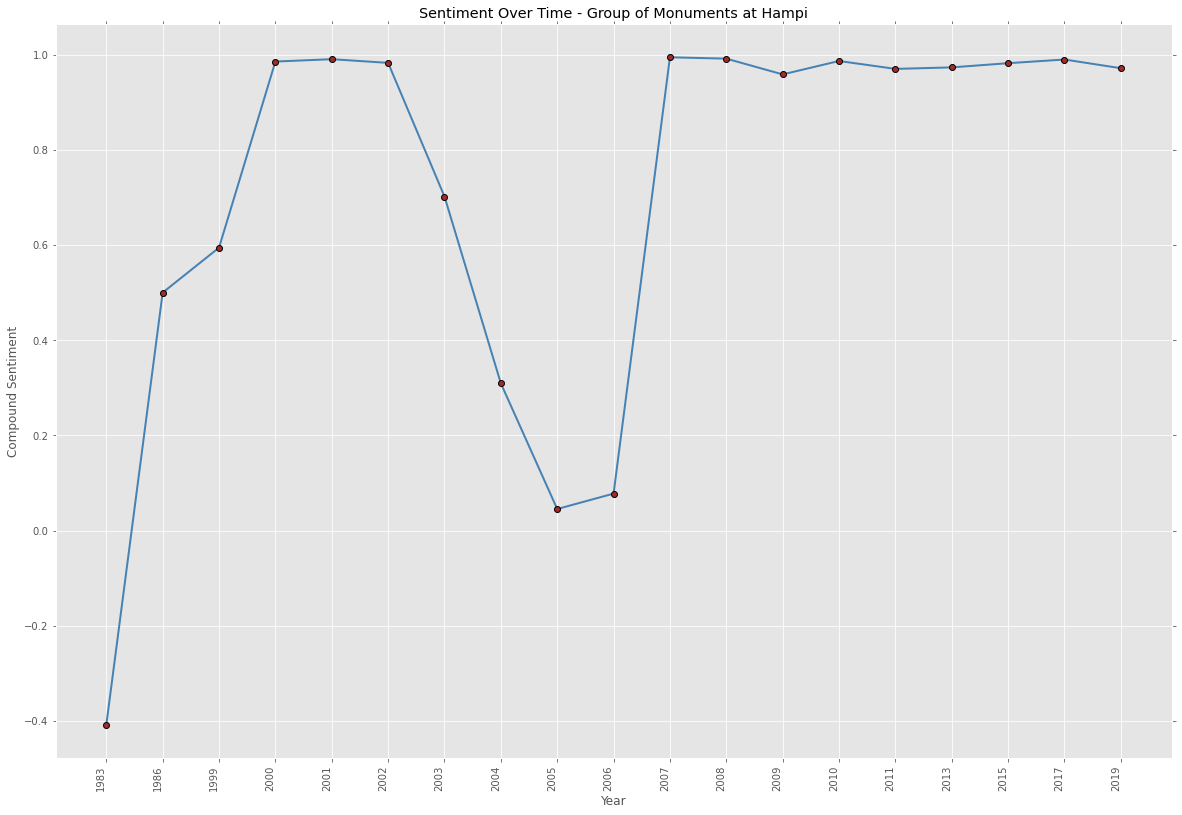

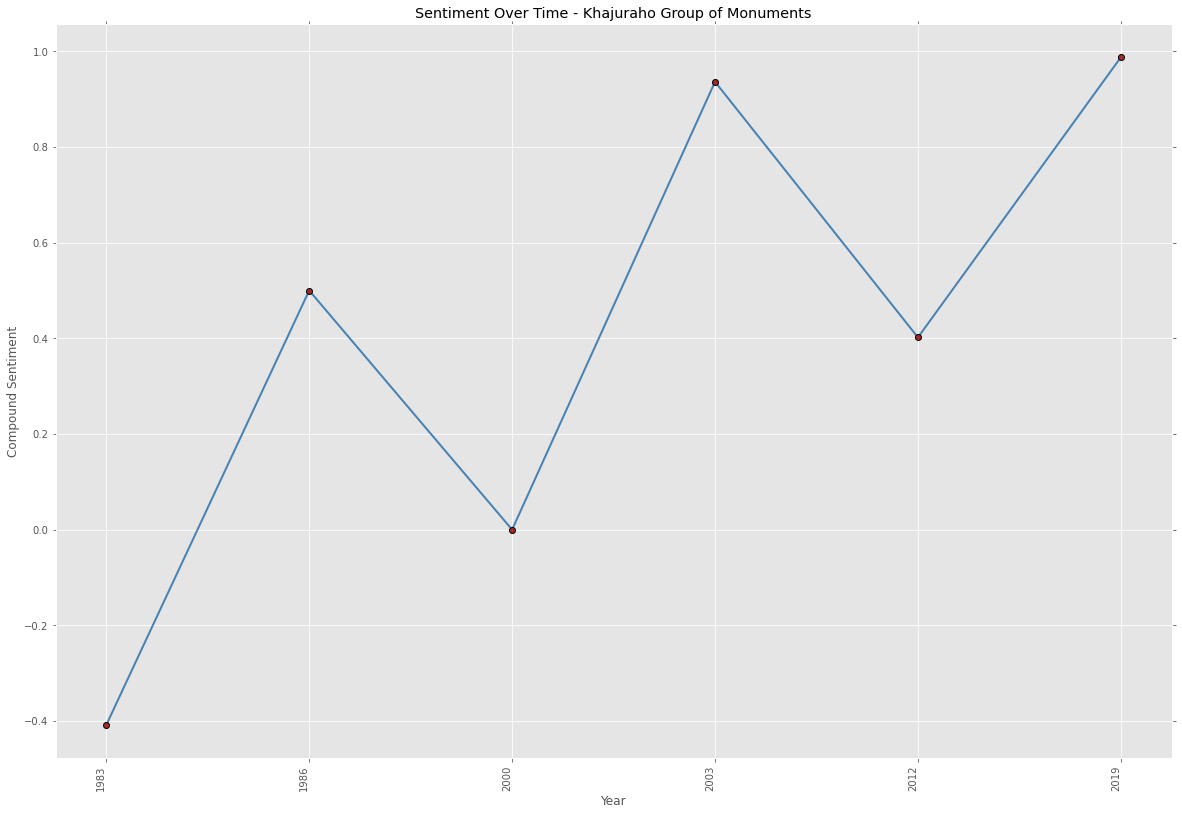

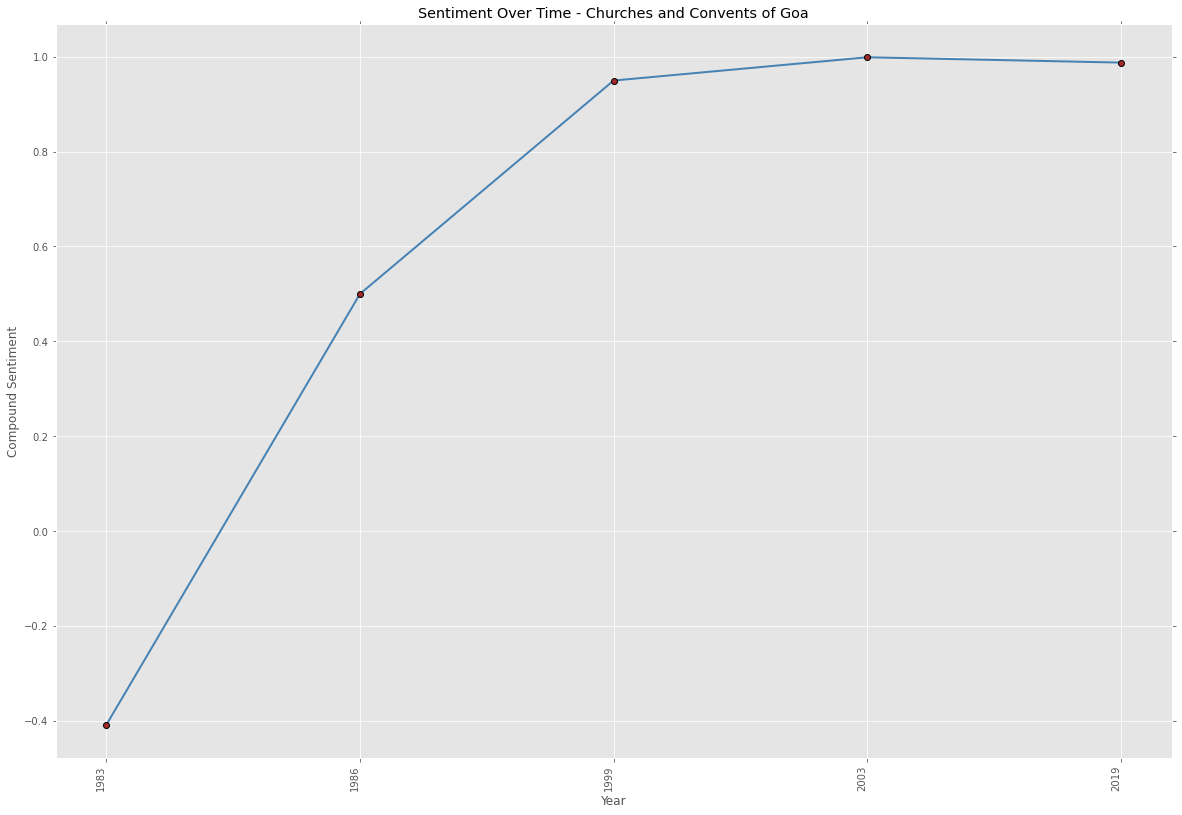

In [65]:
for i in range(0, len(data_india_for_analysis['site_name'].unique())):
    test = data_india_for_analysis[data_india_for_analysis['site_name'] == (data_india_for_analysis['site_name'].unique())[i]]
    test = test.reset_index(drop = True)
    if(len(test) >= 2):
        OvertimeAnalysis(test)

C:\Users\86138\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


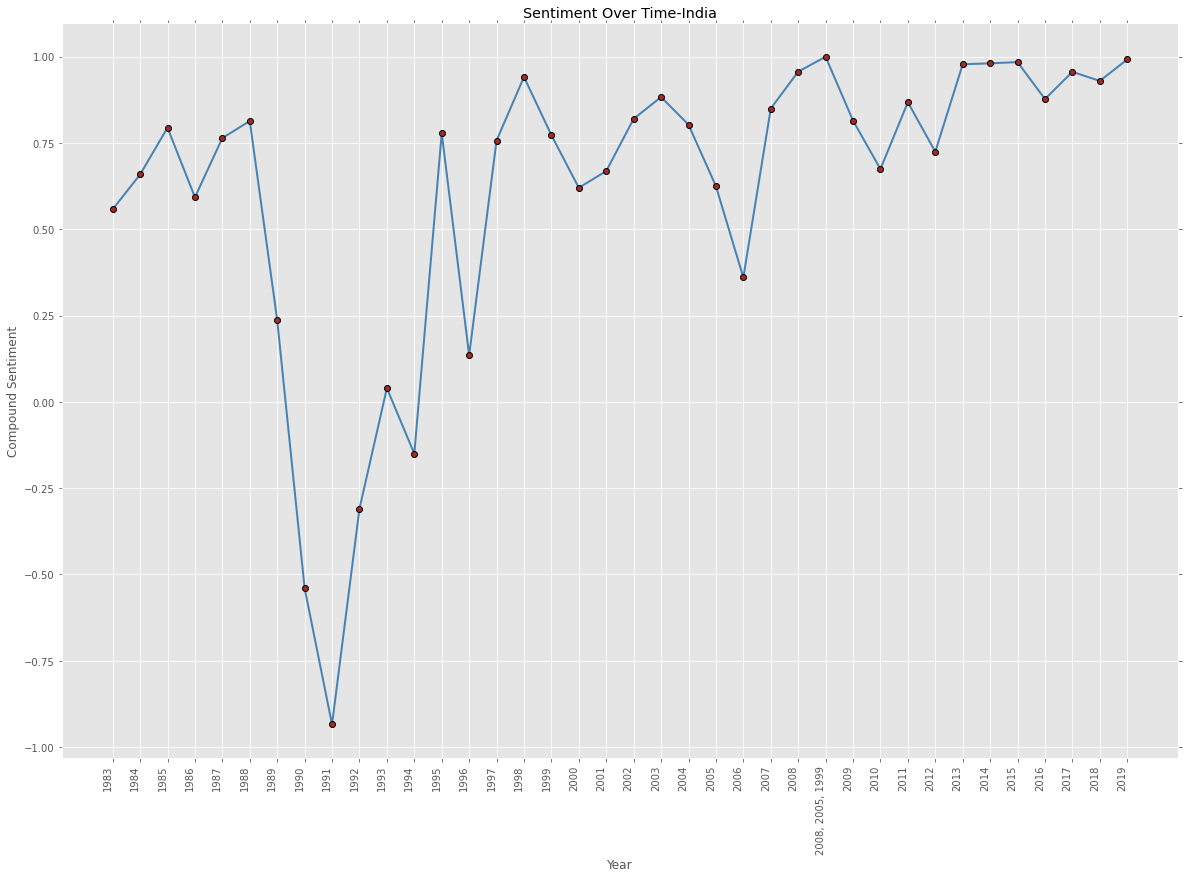

In [69]:
OvertimeAnalysis(data_india_for_analysis)

In [3]:
# data for Peru
data_for_peru = pd.read_excel('D:\\Peru Data.xlsx', sheet_name='Sheet1')
data_for_peru.head()

country_name                                country_link  \
0         Peru  https://whc.unesco.org/en/statesparties/pe   
1         Peru  https://whc.unesco.org/en/statesparties/pe   
2         Peru  https://whc.unesco.org/en/statesparties/pe   
3         Peru  https://whc.unesco.org/en/statesparties/pe   
4         Peru  https://whc.unesco.org/en/statesparties/pe   

                                   site_name  \
0              Chan Chan Archaeological Zone   
1                              City of Cuzco   
2     Lines and Geoglyphs of Nasca and Palpa   
3  Historical Centre of the City of Arequipa   
4             Qhapaq 脩an, Andean Road System   

                             site_link                  coordinates  \
0   https://whc.unesco.org/en/list/366      S8 6 28.21 W79 4 29.053   
1   https://whc.unesco.org/en/list/273   S13 31 2.194 W71 58 48.014   
2   https://whc.unesco.org/en/list/700   S14 43 32.988 W75 8 54.996   
3  https://whc.unesco.org/en/list/1016  S16 23 54.071 W71 32 12.397   
4  https://whc.unesco.org/en/list/1459           S18 15 0 W69 35 30   

                                           doc_title  \
0                  Advisory Body Evaluation (ICOMOS)   
1  Advisory Body Evaluation (ICOMOS) / 脡valuation...   
2                  Advisory Body Evaluation (ICOMOS)   
3                  Advisory Body Evaluation (ICOMOS)   
4                  Advisory Body Evaluation (ICOMOS)   

                                 doc_link  doc_year      doc_type  \
0  https://whc.unesco.org/document/153276      1986  ABevaluation   
1  https://whc.unesco.org/document/153087      1983  ABevaluation   
2  https://whc.unesco.org/document/154050      1994  ABevaluation   
3  https://whc.unesco.org/document/151538      2000  ABevaluation   
4  https://whc.unesco.org/document/152728      2014  ABevaluation   

                                         doc_content  ... Unnamed: 722  \
0  ICOMOS INTERNATIONAL COUNCIL ON MONUMENTS AND ...  ...          NaN   
1  ICOM INTERNATIONAL COUNCIL CONSEIL 0S ON MONUM...  ...          NaN   
2  WORLD HERITAGE LIST Nasca No 700 Identificatio...  ...          NaN   
3  Arequipa (Peru) No 1016 Identification Nominat...  ...          NaN   
4  Qhapagq Nan (Argentina, Bolivia, Chile, Colomb...  ...          NaN   

  Unnamed: 723 Unnamed: 724 Unnamed: 725 Unnamed: 726 Unnamed: 727  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

  Unnamed: 728 Unnamed: 729 Unnamed: 730 Unnamed: 731  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  

[5 rows x 732 columns]

In [4]:
data_peru_for_analysis = data_for_peru.iloc[:, [2,5,7,9]]
data_peru_for_analysis.head(5)

site_name  \
0              Chan Chan Archaeological Zone   
1                              City of Cuzco   
2     Lines and Geoglyphs of Nasca and Palpa   
3  Historical Centre of the City of Arequipa   
4             Qhapaq 脩an, Andean Road System   

                                           doc_title  doc_year  \
0                  Advisory Body Evaluation (ICOMOS)      1986   
1  Advisory Body Evaluation (ICOMOS) / 脡valuation...      1983   
2                  Advisory Body Evaluation (ICOMOS)      1994   
3                  Advisory Body Evaluation (ICOMOS)      2000   
4                  Advisory Body Evaluation (ICOMOS)      2014   

                                         doc_content  
0  ICOMOS INTERNATIONAL COUNCIL ON MONUMENTS AND ...  
1  ICOM INTERNATIONAL COUNCIL CONSEIL 0S ON MONUM...  
2  WORLD HERITAGE LIST Nasca No 700 Identificatio...  
3  Arequipa (Peru) No 1016 Identification Nominat...  
4  Qhapagq Nan (Argentina, Bolivia, Chile, Colomb...

In [5]:
data_peru_for_analysis['site_name'].unique()

array(['Chan Chan Archaeological Zone', 'City of Cuzco',
       'Lines and Geoglyphs of Nasca and Palpa',
       'Historical Centre of the City of Arequipa',
       'Qhapaq 脩an, Andean Road System', 'Historic Centre of Lima',
       'Historic Sanctuary of Machu Picchu', 'Man煤 National Park',
       'Chavin (Archaeological Site)', 'Sacred City of Caral-Supe',
       'Huascar谩n National Park', 'R铆o Abiseo National Park'],
      dtype=object)

In [7]:
# df_all.columns = ['Year', 'Chan Chan Archaeological Zone', 'City of Cuzco',
#        'Lines and Geoglyphs of Nasca and Palpa',
#        'Historical Centre of the City of Arequipa',
#        'Qhapaq Ñan, Andean Road System', 'Historic Centre of Lima',
#        'Historic Sanctuary of Machu Picchu', 'Man煤 National Park',
#        'Chavin (Archaeological Site)', 'Sacred City of Caral-Supe',
#        'Huascarán National Park', 'Río Abiseo National Park']

In [8]:
year = np.arange(1983, 2022, 1)
df_all = pd.DataFrame(year, columns=['doc_year'])

df_list = []

for i in range(0, len(data_peru_for_analysis['site_name'].unique())):
    test = data_peru_for_analysis[data_peru_for_analysis['site_name'] == (data_peru_for_analysis['site_name'].unique())[i]]
    test = test.reset_index(drop = True)
    if(len(test) >= 2):
        df_new = OvertimeAnalysis_doc(test)
    df_1 = pd.merge(df_all, df_new, on = 'doc_year', how = 'right')
    df_list.append(df_1)

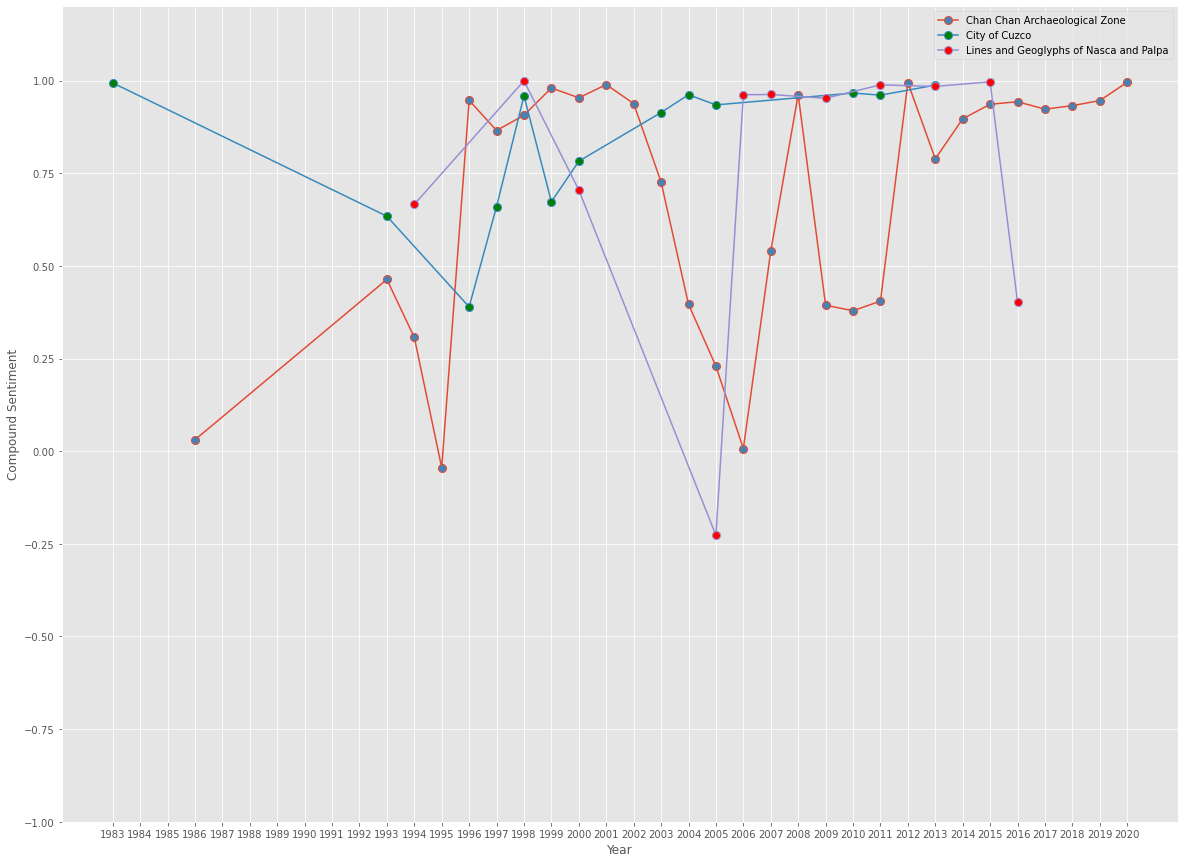

In [9]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(20, 15))

plt.plot(df_list[0]['doc_year'],df_list[0]['sentiment'], marker = 'o', markersize = 8, markerfacecolor = 'steelblue', label = 'Chan Chan Archaeological Zone')
plt.plot(df_list[1]['doc_year'],df_list[1]['sentiment'], marker = 'o', markersize = 8, markerfacecolor = 'green', label = 'City of Cuzco')
plt.plot(df_list[2]['doc_year'],df_list[2]['sentiment'], marker = 'o', markersize = 8, markerfacecolor = 'red', label = 'Lines and Geoglyphs of Nasca and Palpa')
# plt.plot(df_list[3]['doc_year'],df_list[3]['sentiment'], marker = 'o', markersize = 8, markerfacecolor = 'pink', label = 'Historical Centre of the City of Arequipa')
# plt.plot(df_list[4]['doc_year'],df_list[4]['sentiment'], marker = 'o', markersize = 8, markerfacecolor = 'purple', label = 'Qhapaq Ñan, Andean Road System')
# plt.plot(df_list[5]['doc_year'],df_list[5]['sentiment'], marker = 'o', markersize = 8, markerfacecolor = 'yellow', label = 'Historic Centre of Lima')
# plt.plot(df_list[6]['doc_year'],df_list[6]['sentiment'], marker = 'o', markersize = 8, markerfacecolor = 'orange', label = 'Historic Sanctuary of Machu Picchu')
# plt.plot(df_list[7]['doc_year'],df_list[7]['sentiment'], marker = 'o', markersize = 8, markerfacecolor = 'brown', label = 'Man煤 National Park')
# plt.plot(df_list[8]['doc_year'],df_list[8]['sentiment'], marker = 'o', markersize = 8, markerfacecolor = 'olive', label = 'Chavin (Archaeological Site)')
# plt.plot(df_list[9]['doc_year'],df_list[9]['sentiment'], marker = 'o', markersize = 8, markerfacecolor = 'cyan', label = 'Sacred City of Caral-Supe')
# plt.plot(df_list[10]['doc_year'],df_list[10]['sentiment'], marker = 'o', markersize = 8, markerfacecolor = 'black', label = 'Huascarán National Park')
# plt.plot(df_list[11]['doc_year'],df_list[11]['sentiment'], marker = 'o', markersize = 8, markerfacecolor = 'violet', label = 'Río Abiseo National Park')


plt.xticks(range(1983, 2021 ,1))
plt.ylim(-1, 1.2)
plt.xlabel('Year')
plt.ylabel('Compound Sentiment')
plt.legend()
plt.savefig('part1_Peru.svg', format = 'svg')
plt.show()

C:\Users\86138\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


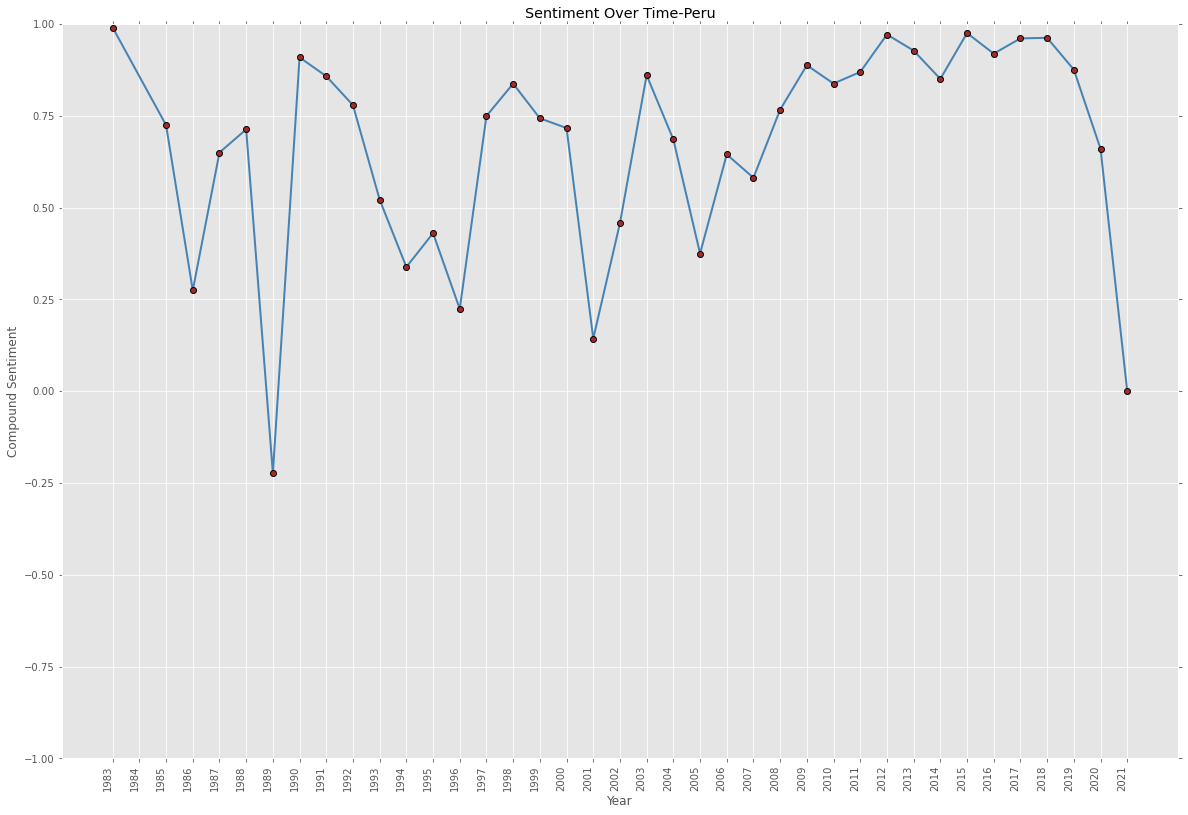

In [13]:
OvertimeAnalysis(data_peru_for_analysis)